# Exploratory Data Analysis

Import essential libraries

In [304]:
# basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint

# tree visualisation
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

---

## Import Cleaned Dataset

Creating a dataframe from the cleaned dataset processed in [2-data-preparation-and-cleaning](2-data-preparation-and-cleaning.ipynb) jupyter notebook.

In [305]:
cleaned_dataset = pd.read_csv('datasets/cleaned_dataset.csv', sep=',')
display(cleaned_dataset)

,t1_result,t2_result,t1p1_champion,t1p1_class,t1p2_champion,t1p2_class,t1p3_champion,t1p3_class,t1p4_champion,t1p4_class,...,t1_heralds,t2_heralds,t1_towers,t2_towers,t1_inhibitors,t2_inhibitors,t1_kills,t2_kills,t1_totalcs,t2_totalcs
0,1,0,Jax,Warrior,Bel'Veth,Warrior,Neeko,Mage,Caitlyn,Marksman,...,0,0,10,0,2,0,21,3,786,588
1,1,0,Udyr,Warrior,Xin Zhao,Warrior,Azir,Mage,Kalista,Marksman,...,1,0,9,9,1,1,15,3,826,646
2,1,0,Zac,Tank-Warrior,Vi,Warrior,Azir,Mage,Senna,Marksman-Support,...,1,0,10,10,2,2,21,2,817,675
3,1,0,Aatrox,Warrior,Jax,Warrior,Hwei,Mage,Kalista,Marksman,...,1,0,10,10,2,2,26,7,734,571
4,1,0,Rumble,Mage-Warrior,Maokai,Tank,Tristana,Marksman,Lucian,Marksman,...,1,0,9,9,2,2,20,3,808,676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0,1,Udyr,Warrior,Lee Sin,Warrior-Assassin,Akali,Assassin,Kalista,Marksman,...,1,0,7,7,0,0,25,23,1452,1652
1019,0,1,Jax,Warrior,Sejuani,Tank,Azir,Mage,Varus,Marksman,...,0,0,7,7,2,2,8,12,1735,1709
1020,0,1,Rumble,Mage-Warrior,Xin Zhao,Warrior,Akali,Assassin,Miss Fortune,Marksman,...,1,0,5,5,2,2,22,25,1395,1423
1021,0,1,Aatrox,Warrior,Xin Zhao,Warrior,Corki,Marksman,Xayah,Marksman,...,0,0,8,8,2,2,25,33,1424,1504


---

## Exploration - Problem Definition 1

**Analyze official competitive matches and identify the best champion class combination that will result in a win.**

To do so, we have combined the data sets from the Game Match Dataset and Champion Info Dataset and filtered it out to only take in teams that won.

We then further merged the classes for each champion and inputted them in the dataframe. (e.g P1 Top (Name of Champion) P1 Top Class (Class type of champion))

In [306]:
desired_columns_problem_1_team_1 = ['t1_result', 't1p1_champion', 't1p1_class', 't1p2_champion', 't1p2_class', 't1p3_champion', 't1p3_class', 't1p4_champion', 't1p4_class', 't1p5_champion', 't1p5_class']
desired_columns_problem_1_team_2 = ['t2_result', 't2p1_champion', 't2p1_class', 't2p2_champion', 't2p2_class', 't2p3_champion', 't2p3_class', 't2p4_champion', 't2p4_class', 't2p5_champion', 't2p5_class']

problem_1_data_team_1 = pd.DataFrame(cleaned_dataset, columns=desired_columns_problem_1_team_1)
problem_1_data_team_2 = pd.DataFrame(cleaned_dataset, columns=desired_columns_problem_1_team_2)

problem_1_data_team_1.columns = ['result', 'p1_champion', 'p1_class', 'p2_champion', 'p2_class', 'p3_champion', 'p3_class', 'p4_champion', 'p4_class', 'p5_champion', 'p5_class']
problem_1_data_team_2.columns = ['result', 'p1_champion', 'p1_class', 'p2_champion', 'p2_class', 'p3_champion', 'p3_class', 'p4_champion', 'p4_class', 'p5_champion', 'p5_class']

problem_1_data_all_team = pd.concat([problem_1_data_team_1, problem_1_data_team_2], ignore_index=True)

del problem_1_data_team_1
del problem_1_data_team_2

problem_1_data_winning_team = problem_1_data_all_team[problem_1_data_all_team['result'] == 1]
display(problem_1_data_winning_team)

,result,p1_champion,p1_class,p2_champion,p2_class,p3_champion,p3_class,p4_champion,p4_class,p5_champion,p5_class
0,1,Jax,Warrior,Bel'Veth,Warrior,Neeko,Mage,Caitlyn,Marksman,Lux,Mage
1,1,Udyr,Warrior,Xin Zhao,Warrior,Azir,Mage,Kalista,Marksman,Renata Glasc,Support
2,1,Zac,Tank-Warrior,Vi,Warrior,Azir,Mage,Senna,Marksman-Support,Maokai,Tank
3,1,Aatrox,Warrior,Jax,Warrior,Hwei,Mage,Kalista,Marksman,Nautilus,Tank-Support
4,1,Rumble,Mage-Warrior,Maokai,Tank,Tristana,Marksman,Lucian,Marksman,Milio,Support
...,...,...,...,...,...,...,...,...,...,...,...
2039,1,Yone,Warrior,Jax,Warrior,LeBlanc,Mage-Assassin,Xayah,Marksman,Nautilus,Tank-Support
2041,1,Gnar,Warrior,Rell,Tank-Support,Kai'Sa,Marksman,Varus,Marksman,Renata Glasc,Support
2042,1,K'Sante,Tank-Warrior,Maokai,Tank,LeBlanc,Mage-Assassin,Kalista,Marksman,Zyra,Mage-Support
2043,1,K'Sante,Tank-Warrior,Lee Sin,Warrior-Assassin,Azir,Mage,Senna,Marksman-Support,Nautilus,Tank-Support


In [307]:
problem_1_data_winning_team.drop('result', axis=1, inplace=True)
problem_1_data_winning_team.columns = ['P1 Top', 'P1 Top Class', 'P2 Jungle', 'P2 Jungle Class', 'P3 Mid', 'P3 Mid Class', 'P4 Bot','P4 Bot Class','P5 Support','P5 Support Class']

display(problem_1_data_winning_team)

/var/folders/5s/wdvjkd_x25q036g2mmsyj8h00000gn/T/ipykernel_50397/737486509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem_1_data_winning_team.drop('result', axis=1, inplace=True)


,P1 Top,P1 Top Class,P2 Jungle,P2 Jungle Class,P3 Mid,P3 Mid Class,P4 Bot,P4 Bot Class,P5 Support,P5 Support Class
0,Jax,Warrior,Bel'Veth,Warrior,Neeko,Mage,Caitlyn,Marksman,Lux,Mage
1,Udyr,Warrior,Xin Zhao,Warrior,Azir,Mage,Kalista,Marksman,Renata Glasc,Support
2,Zac,Tank-Warrior,Vi,Warrior,Azir,Mage,Senna,Marksman-Support,Maokai,Tank
3,Aatrox,Warrior,Jax,Warrior,Hwei,Mage,Kalista,Marksman,Nautilus,Tank-Support
4,Rumble,Mage-Warrior,Maokai,Tank,Tristana,Marksman,Lucian,Marksman,Milio,Support
...,...,...,...,...,...,...,...,...,...,...
2039,Yone,Warrior,Jax,Warrior,LeBlanc,Mage-Assassin,Xayah,Marksman,Nautilus,Tank-Support
2041,Gnar,Warrior,Rell,Tank-Support,Kai'Sa,Marksman,Varus,Marksman,Renata Glasc,Support
2042,K'Sante,Tank-Warrior,Maokai,Tank,LeBlanc,Mage-Assassin,Kalista,Marksman,Zyra,Mage-Support
2043,K'Sante,Tank-Warrior,Lee Sin,Warrior-Assassin,Azir,Mage,Senna,Marksman-Support,Nautilus,Tank-Support


In [308]:
merged_data = problem_1_data_winning_team.copy()

# Display the resulting DataFrame
display(merged_data)

,P1 Top,P1 Top Class,P2 Jungle,P2 Jungle Class,P3 Mid,P3 Mid Class,P4 Bot,P4 Bot Class,P5 Support,P5 Support Class
0,Jax,Warrior,Bel'Veth,Warrior,Neeko,Mage,Caitlyn,Marksman,Lux,Mage
1,Udyr,Warrior,Xin Zhao,Warrior,Azir,Mage,Kalista,Marksman,Renata Glasc,Support
2,Zac,Tank-Warrior,Vi,Warrior,Azir,Mage,Senna,Marksman-Support,Maokai,Tank
3,Aatrox,Warrior,Jax,Warrior,Hwei,Mage,Kalista,Marksman,Nautilus,Tank-Support
4,Rumble,Mage-Warrior,Maokai,Tank,Tristana,Marksman,Lucian,Marksman,Milio,Support
...,...,...,...,...,...,...,...,...,...,...
2039,Yone,Warrior,Jax,Warrior,LeBlanc,Mage-Assassin,Xayah,Marksman,Nautilus,Tank-Support
2041,Gnar,Warrior,Rell,Tank-Support,Kai'Sa,Marksman,Varus,Marksman,Renata Glasc,Support
2042,K'Sante,Tank-Warrior,Maokai,Tank,LeBlanc,Mage-Assassin,Kalista,Marksman,Zyra,Mage-Support
2043,K'Sante,Tank-Warrior,Lee Sin,Warrior-Assassin,Azir,Mage,Senna,Marksman-Support,Nautilus,Tank-Support


Here is the prepared data frame after doing the successfuly merging. 

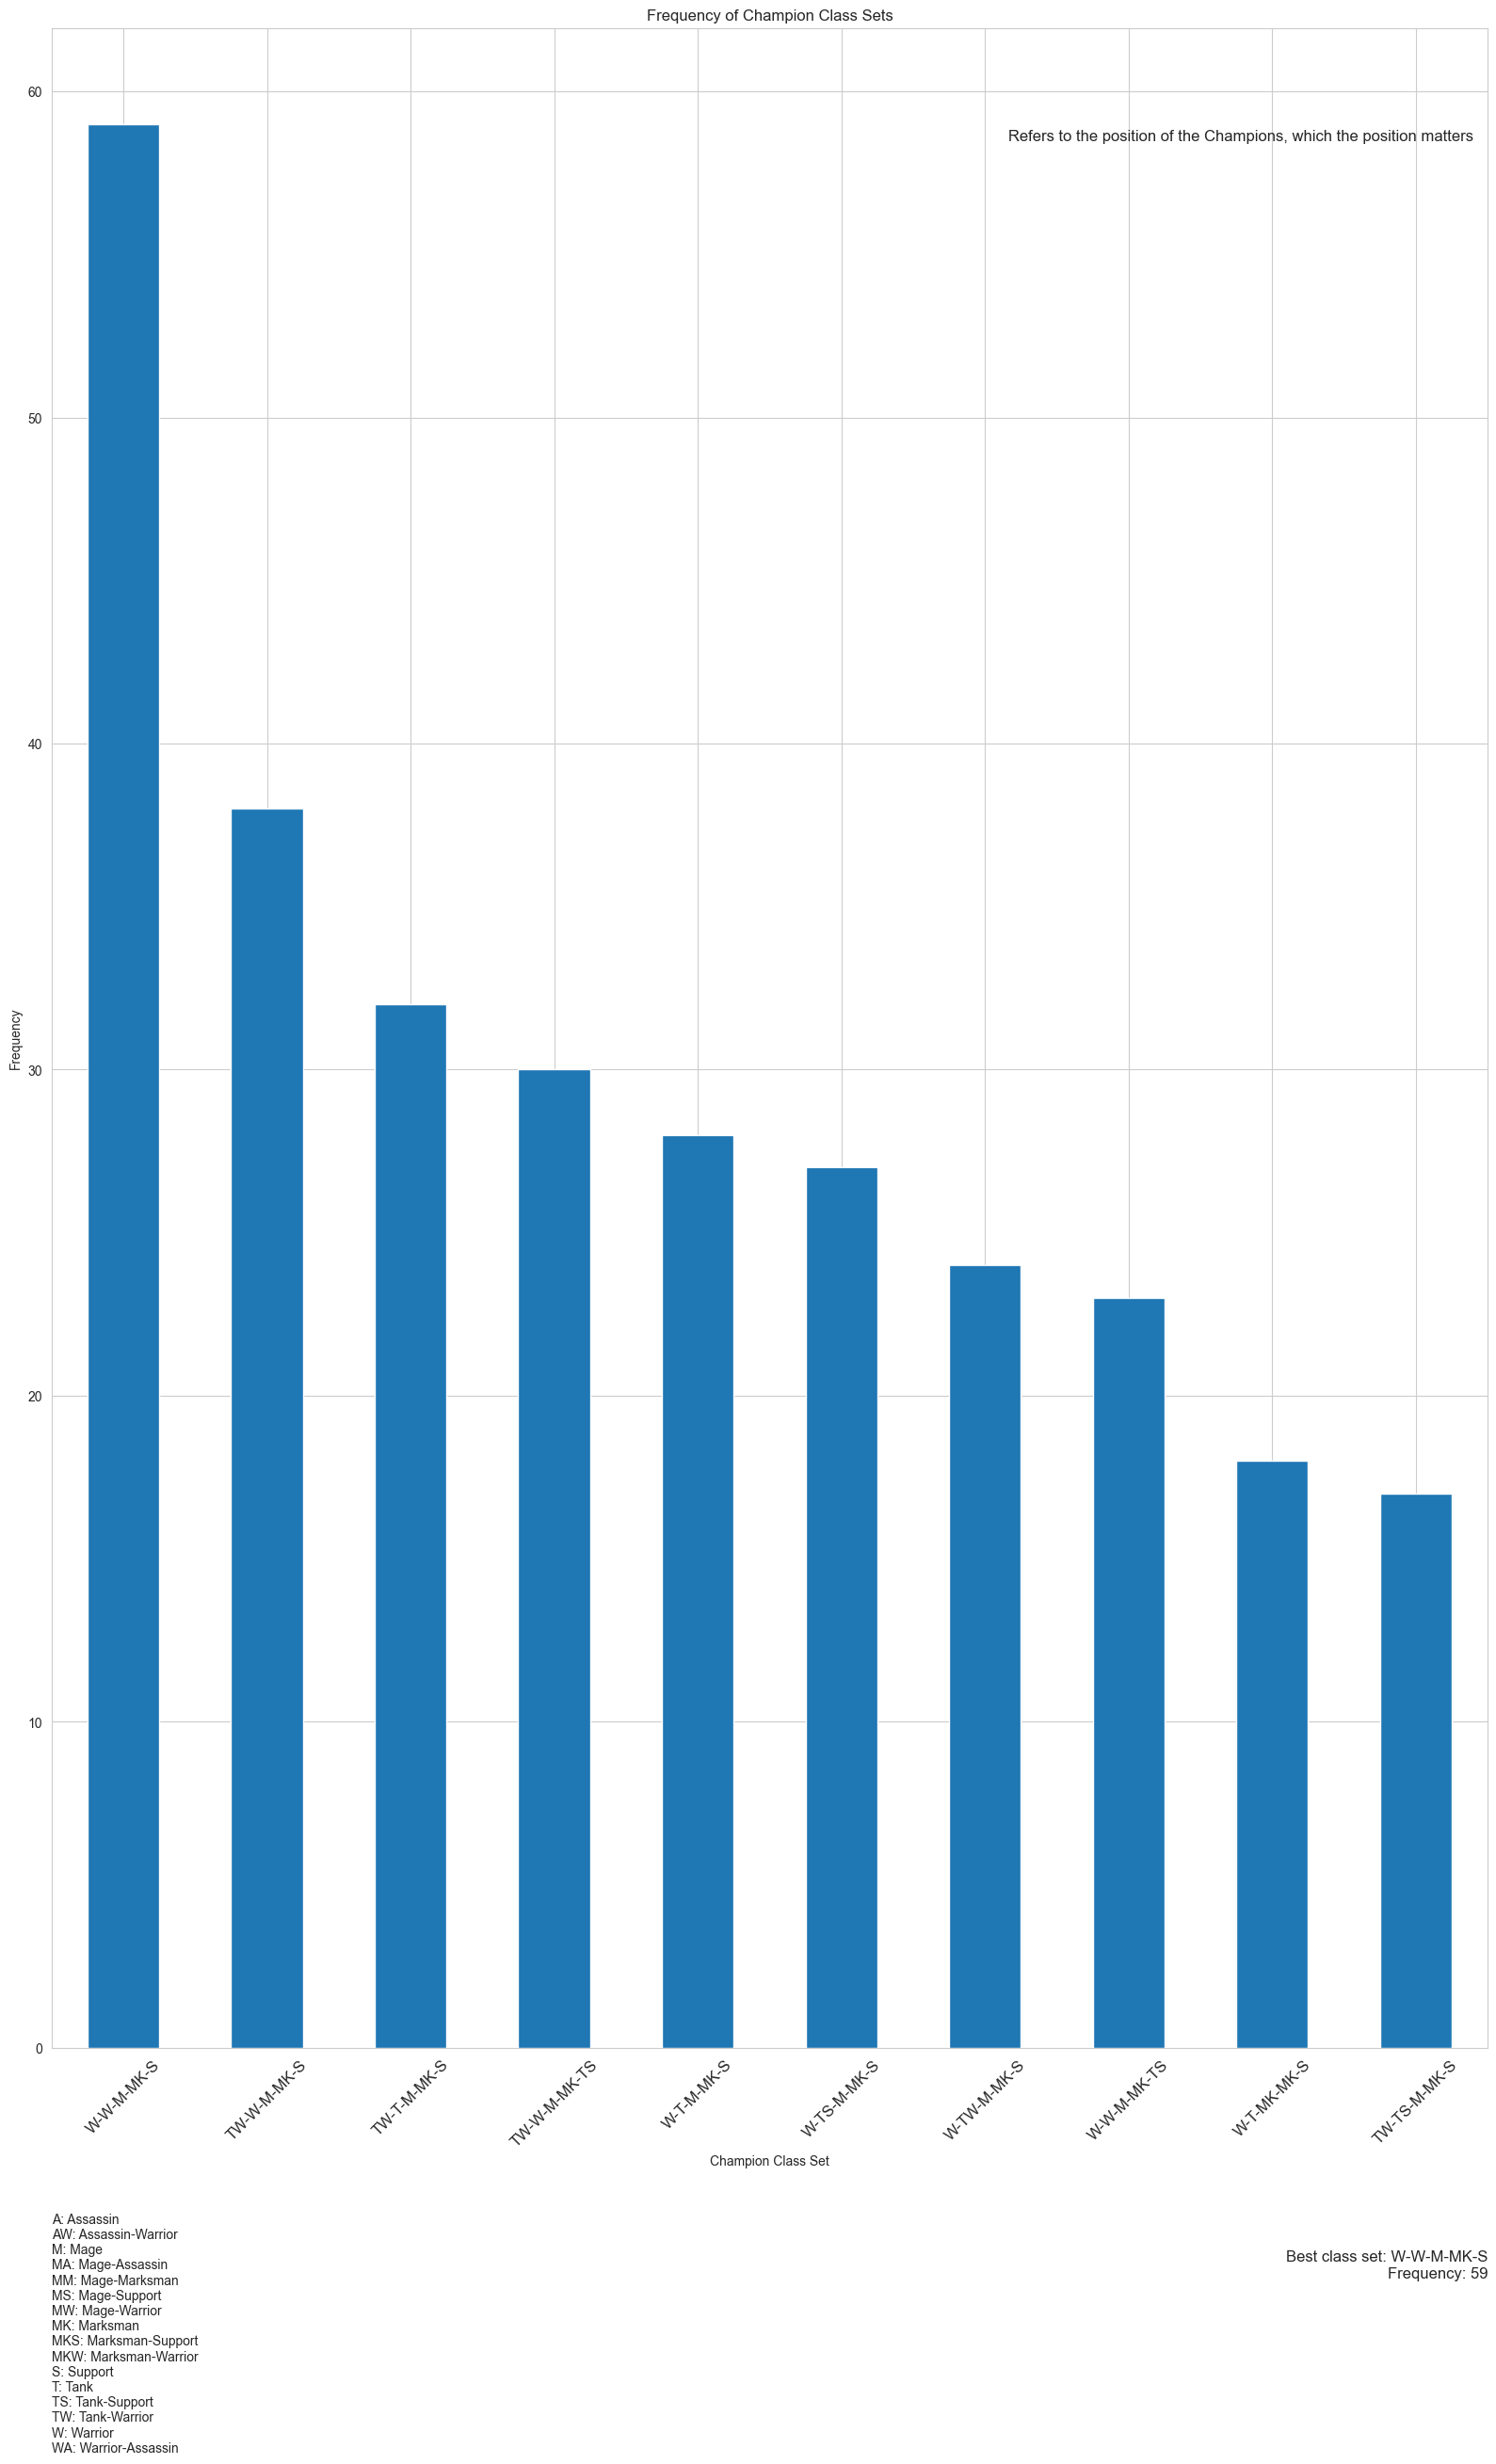

In [309]:
# Define the dataframe with team compositions
data = merged_data[['P1 Top Class', 'P2 Jungle Class', 'P3 Mid Class', 'P4 Bot Class', 'P5 Support Class']]
dfs = pd.DataFrame(data)
# Fill any NaN values with a placeholder string
dfs = dfs.fillna('Unknown')

# Convert all values to strings
dfs = dfs.astype(str)

# Mapping dictionary to replace class names with letters
class_mapping = {
    'Assassin': 'A',
    'Assassin-Warrior': 'AW',
    'Mage': 'M',
    'Mage-Assassin': 'MA',
    'Mage-Marksman': 'MM',
    'Mage-Support': 'MS',
    'Mage-Warrior': 'MW',
    'Marksman': 'MK',
    'Marksman-Support': 'MKS',
    'Marksman-Warrior': 'MKW',
    'Support': 'S',
    'Tank': 'T',
    'Tank-Support': 'TS',
    'Tank-Warrior': 'TW',
    'Warrior': 'W',
    'Warrior-Assassin': 'WA'
}

# Dictionary to map class abbreviations back to full names
class_mapping_reverse = {v: k for k, v in class_mapping.items()}

# Rename class columns with letters
for col in dfs.columns:
    dfs[col] = dfs[col].map(class_mapping)

# Concatenate the class columns to create a new column representing the class set
dfs['Class_Set'] = dfs.apply(lambda row: '-'.join(row), axis=1)

# Count the occurrences of each class set
top_class_sets = dfs['Class_Set'].value_counts().head(10)

# Plotting
plt.figure(figsize=(16, 26))  # Increase the height to accommodate the label below
top_class_sets.plot(kind='bar')
plt.title('Frequency of Champion Class Sets')
plt.xlabel('Champion Class Set')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=12)  # Adjust the rotation and fontsize as needed

# Display class_mapping_reverse at the bottom left of the plot
table_text = '\n'.join([f'{abbr}: {full}' for abbr, full in class_mapping_reverse.items()])
plt.text(0, -0.2, table_text, ha='left', fontsize=10, transform=plt.gca().transAxes)

# Find the class set with the highest frequency
best_class_set = top_class_sets.idxmax()
best_frequency = top_class_sets.max()

# Add text on the top right
bot_right_text = f'Best class set: {best_class_set}\nFrequency: {best_frequency}'
plt.text(1, -0.1, bot_right_text, ha='right', va='top', fontsize=12, transform=plt.gca().transAxes)

top_right_text = f'Refers to the position of the Champions, which the position matters'
plt.text(0.99, 0.95, top_right_text, ha='right', va='top', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

#### The best champion class set is: W-W-M-MK-S
#### Frequency of occurrence: 59

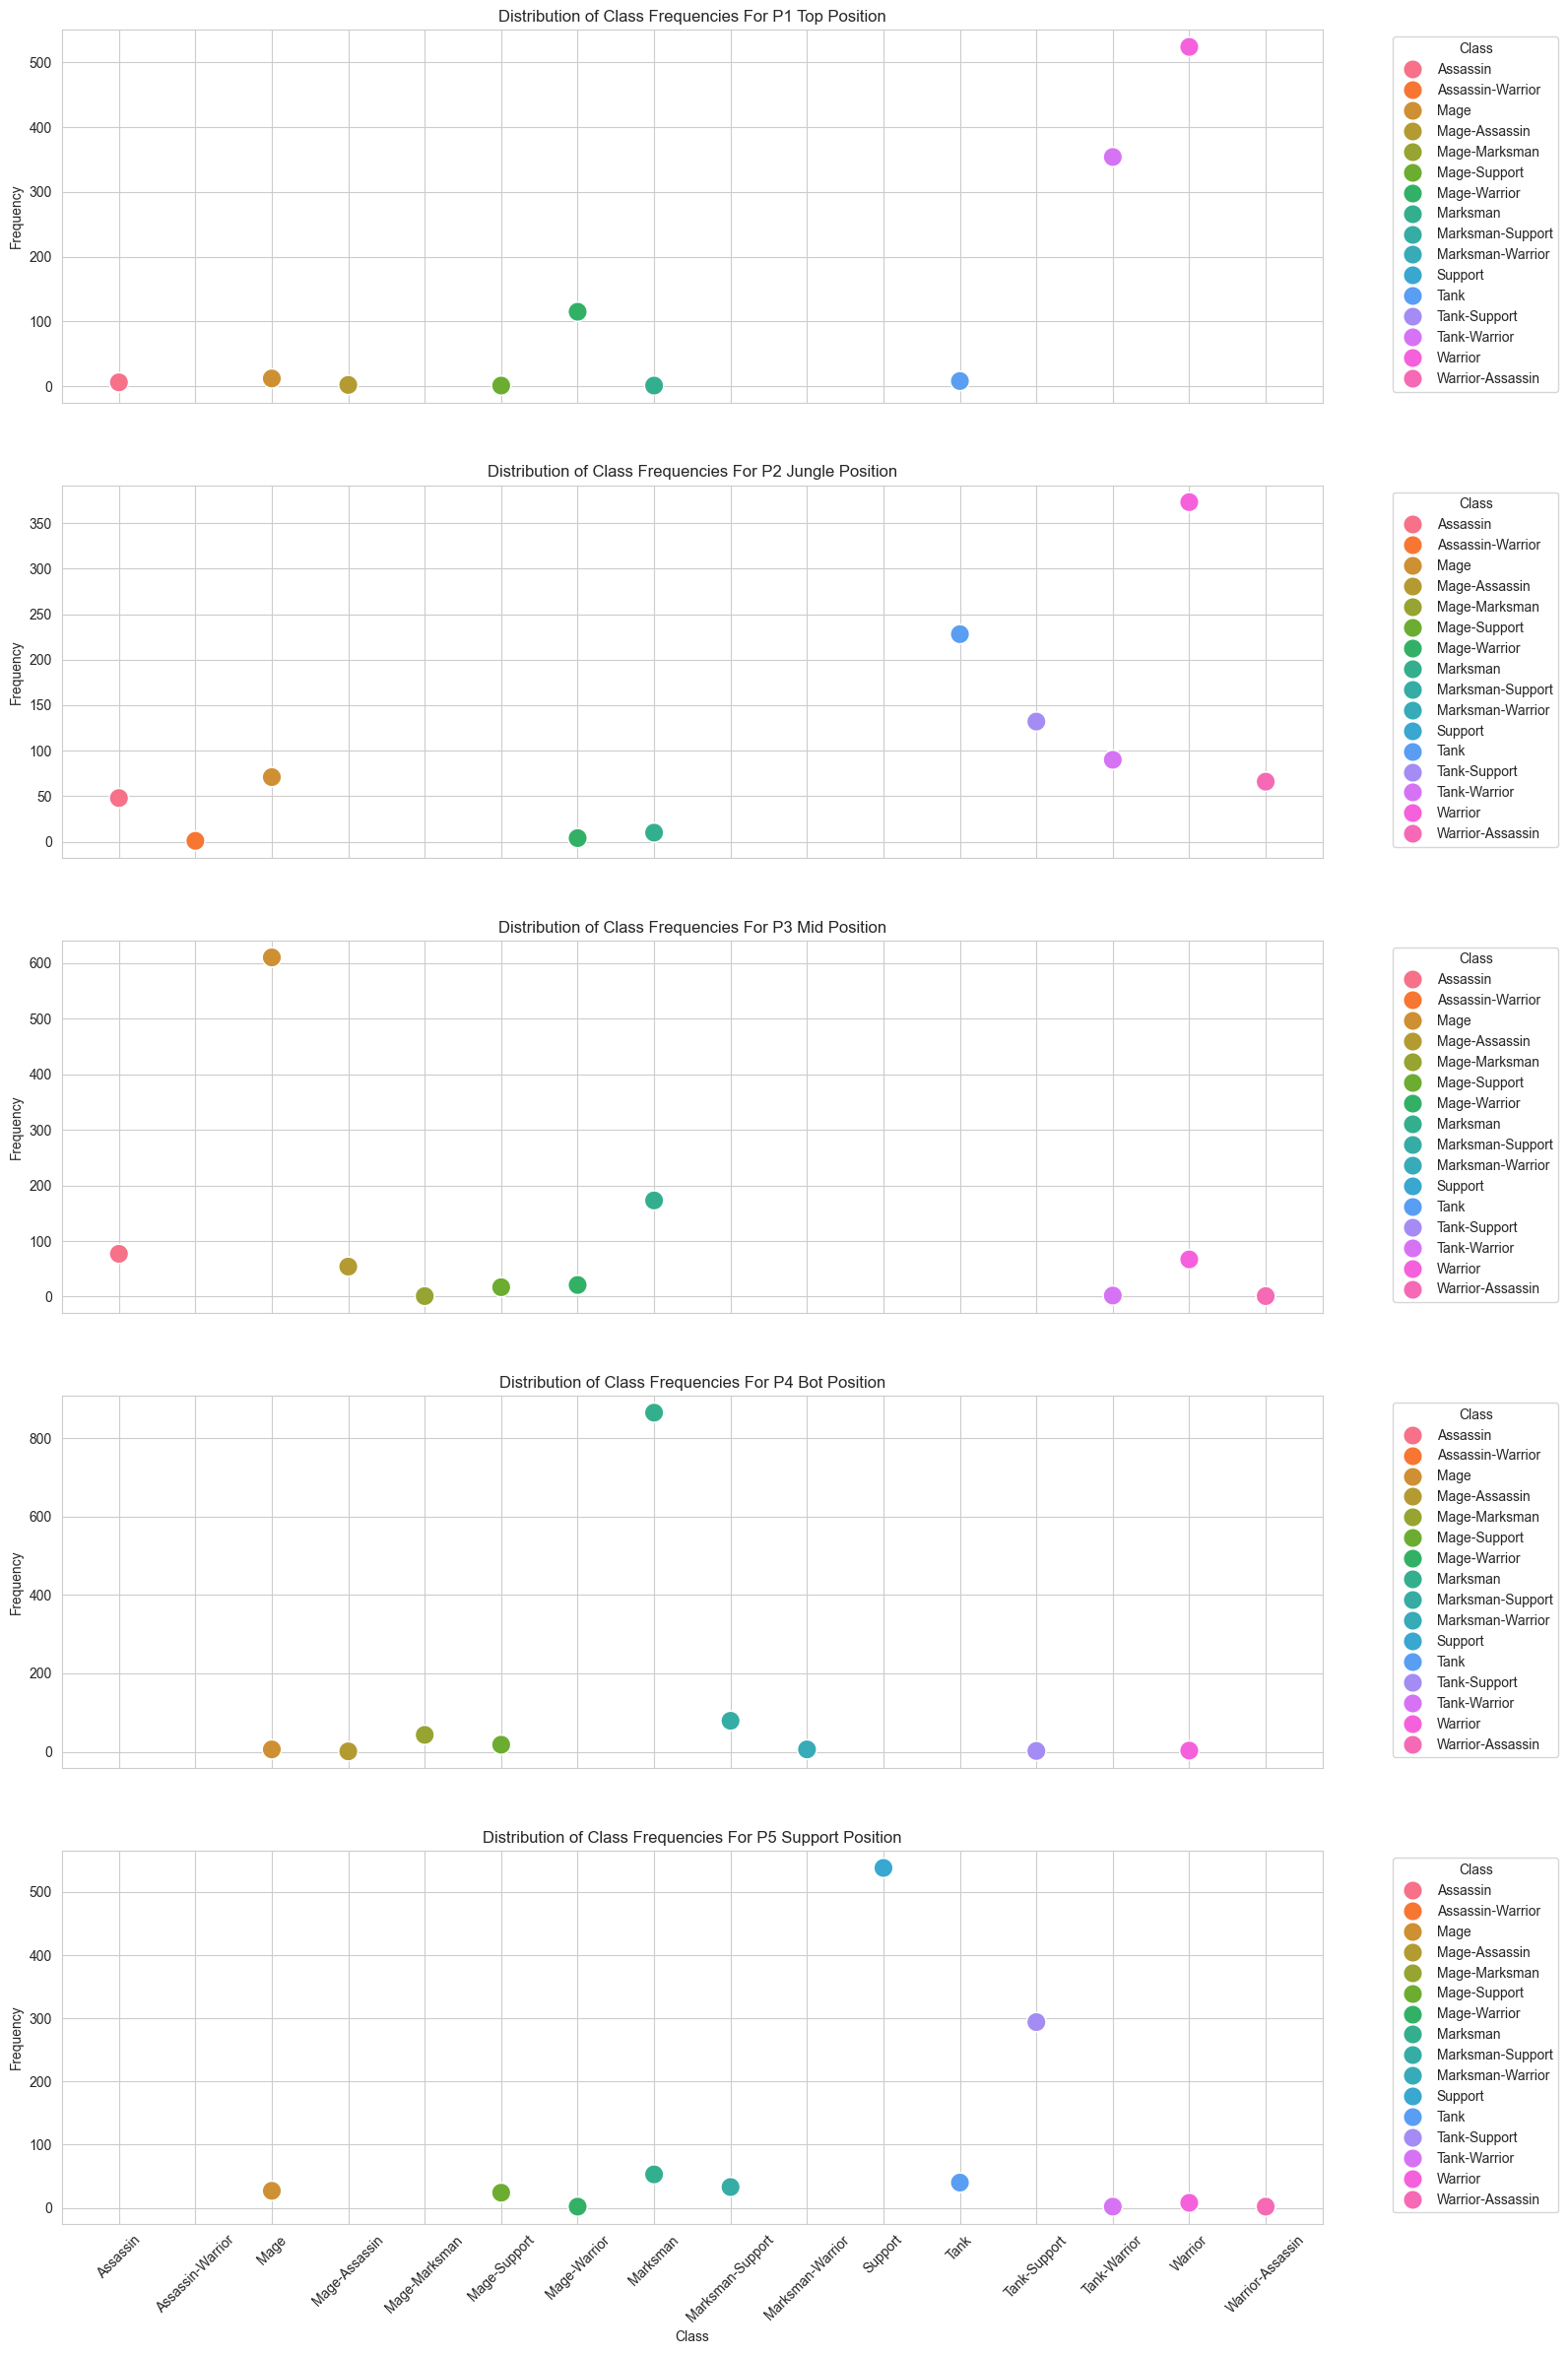

In [310]:

# data = merged_data[['P1 Top Class', 'P2 Jungle Class', 'P3 Mid Class', 'P4 Bot Class', 'P5 Support Class']]

df = pd.DataFrame(data)

# Calculate class frequencies for each position
class_frequencies = df.apply(pd.Series.value_counts)

# Transpose the DataFrame for better visualization
class_frequencies = class_frequencies.T

# Reset index to make position a column instead of index
class_frequencies.reset_index(inplace=True)

# Melt the DataFrame to convert it to long format for plotting
class_frequencies_melted = pd.melt(class_frequencies, id_vars=['index'], var_name='Class', value_name='Frequency')

# Filter data for each position
df_p1 = class_frequencies_melted[class_frequencies_melted['index'] == 'P1 Top Class']
df_p2 = class_frequencies_melted[class_frequencies_melted['index'] == 'P2 Jungle Class']
df_p3 = class_frequencies_melted[class_frequencies_melted['index'] == 'P3 Mid Class']
df_p4 = class_frequencies_melted[class_frequencies_melted['index'] == 'P4 Bot Class']
df_p5 = class_frequencies_melted[class_frequencies_melted['index'] == 'P5 Support Class']

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(16, 24), sharex=True)

# Plot for P1 Top Class
sns.scatterplot(data=df_p1, x='Class', y='Frequency', hue='Class', s=200, ax=axes[0])
axes[0].set_title('Distribution of Class Frequencies For P1 Top Position')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Plot for P2 Jungle Class
sns.scatterplot(data=df_p2, x='Class', y='Frequency', hue='Class', s=200, ax=axes[1])
axes[1].set_title('Distribution of Class Frequencies For P2 Jungle Position')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Plot for P3 Mid Class
sns.scatterplot(data=df_p3, x='Class', y='Frequency', hue='Class', s=200, ax=axes[2])
axes[2].set_title('Distribution of Class Frequencies For P3 Mid Position')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Frequency')
axes[2].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].tick_params(axis='x', rotation=45)

# Plot for P4 Bot Class
sns.scatterplot(data=df_p4, x='Class', y='Frequency', hue='Class', s=200, ax=axes[3])
axes[3].set_title('Distribution of Class Frequencies For P4 Bot Position')
axes[3].set_xlabel('Class')
axes[3].set_ylabel('Frequency')
axes[3].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[3].tick_params(axis='x', rotation=45)

# Plot for P5 Support Class
sns.scatterplot(data=df_p5, x='Class', y='Frequency', hue='Class', s=200, ax=axes[4])
axes[4].set_title('Distribution of Class Frequencies For P5 Support Position')
axes[4].set_xlabel('Class')
axes[4].set_ylabel('Frequency')
axes[4].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

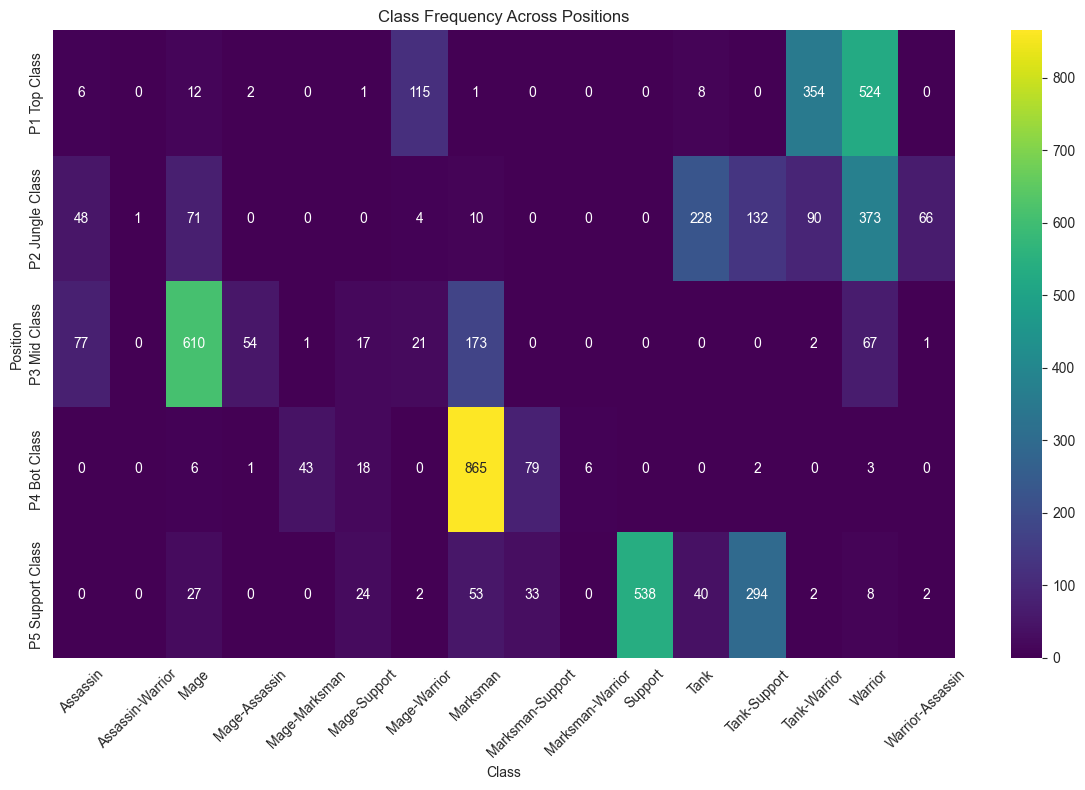

In [311]:
# Pivot the DataFrame
heatmap_data = class_frequencies_melted.pivot_table(index='index', columns='Class', values='Frequency', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.0f')  # Use '.0f' for floats
plt.title('Class Frequency Across Positions')
plt.xlabel('Class')
plt.ylabel('Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

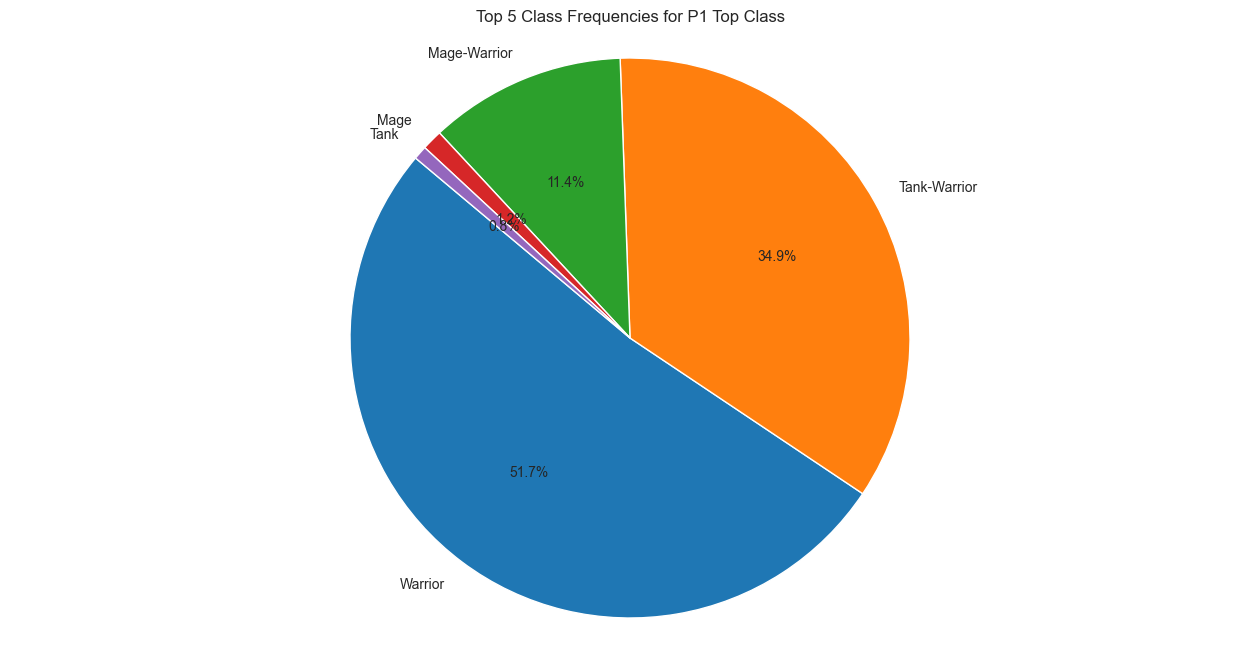

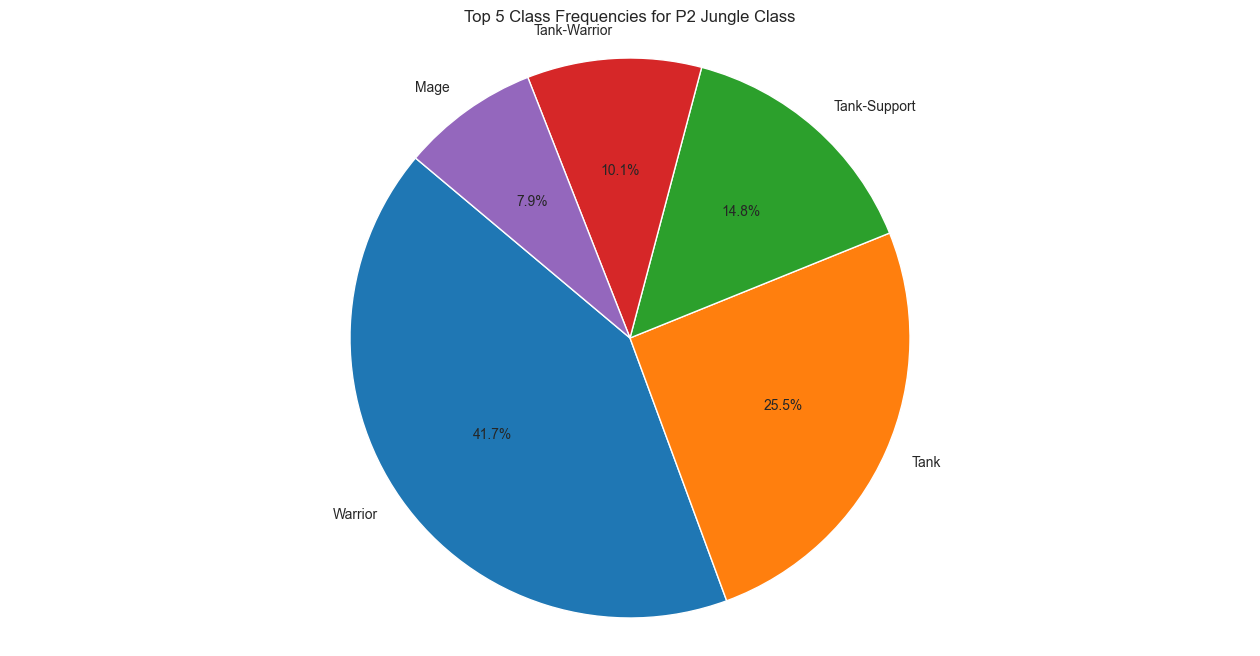

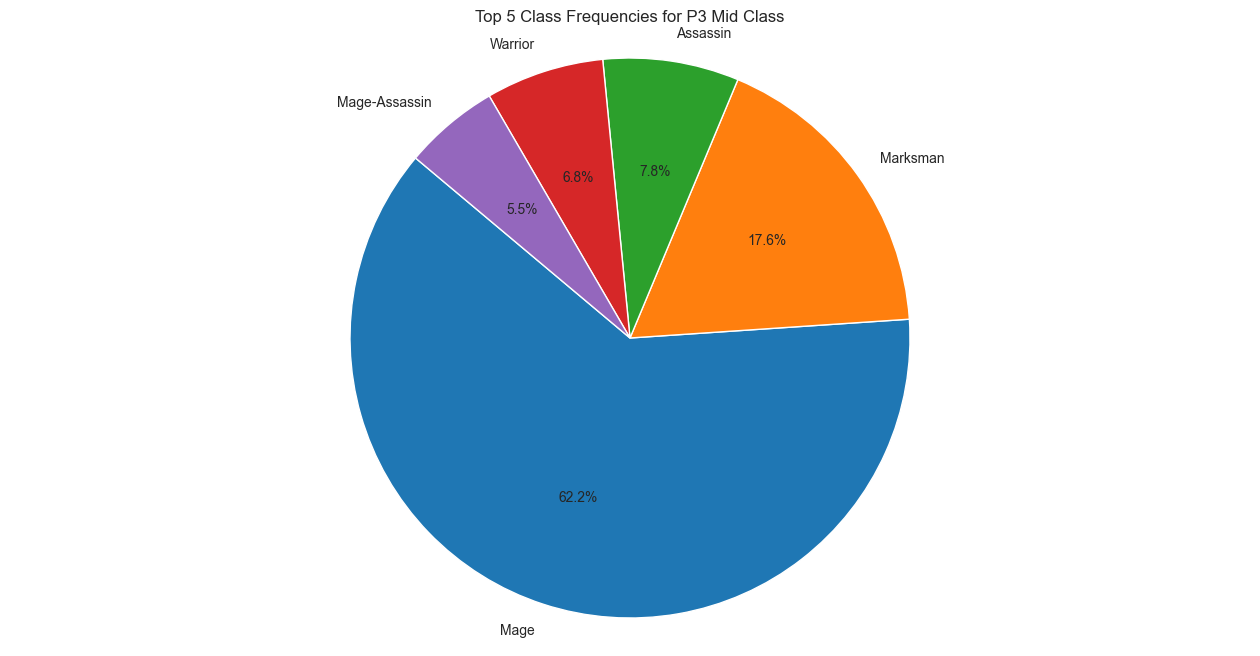

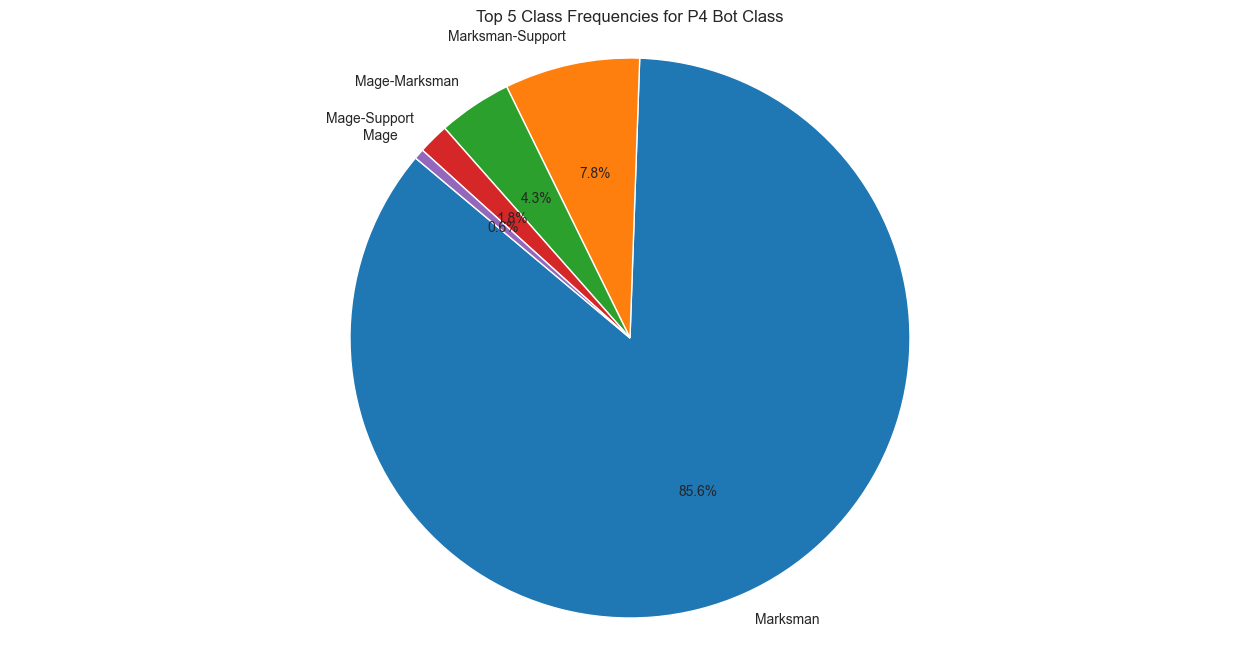

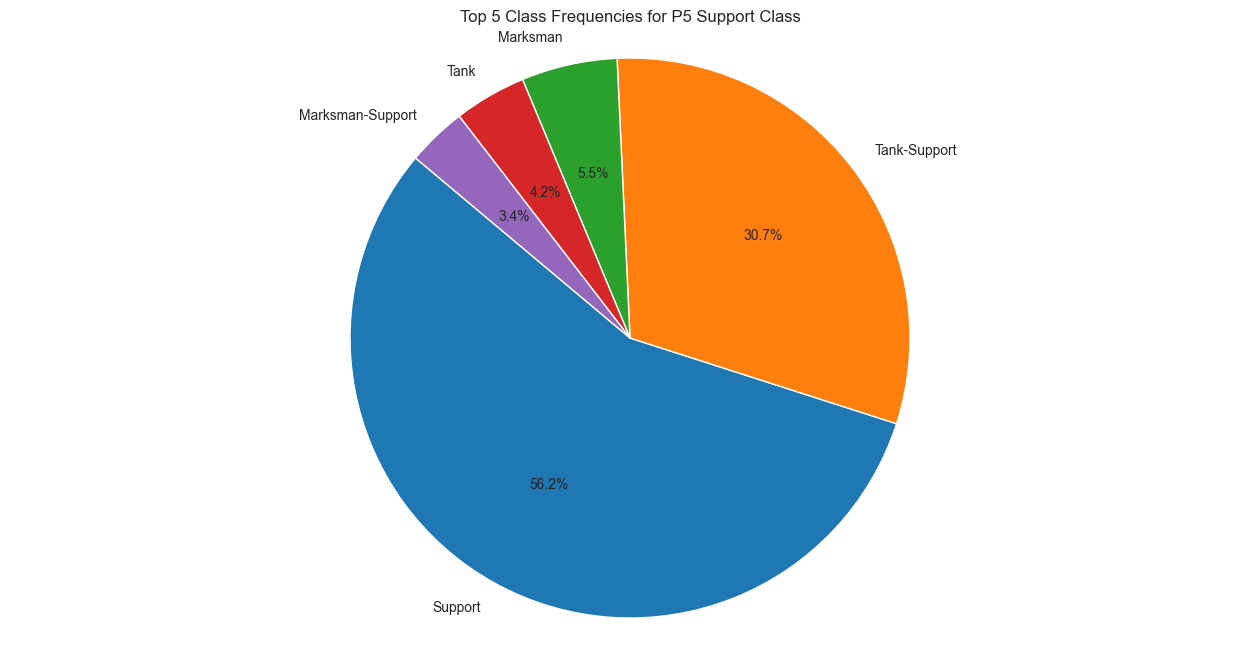

In [312]:
# Iterate over each position
positions = class_frequencies_melted['index'].unique()
for position in positions:
    # Filter data for the current position
    df_position = class_frequencies_melted[class_frequencies_melted['index'] == position]
    
    # Calculate total frequencies for each class for the current position
    total_class_frequencies = df_position.groupby('Class')['Frequency'].sum()
    
    # Sort the class frequencies in descending order and select the top 5 classes
    top_5_classes = total_class_frequencies.sort_values(ascending=False).head(5)
    
    # Plot the pie chart for the top 5 classes in the current position
    plt.figure(figsize=(16, 8))
    plt.pie(top_5_classes, labels=top_5_classes.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Class Frequencies for {position}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


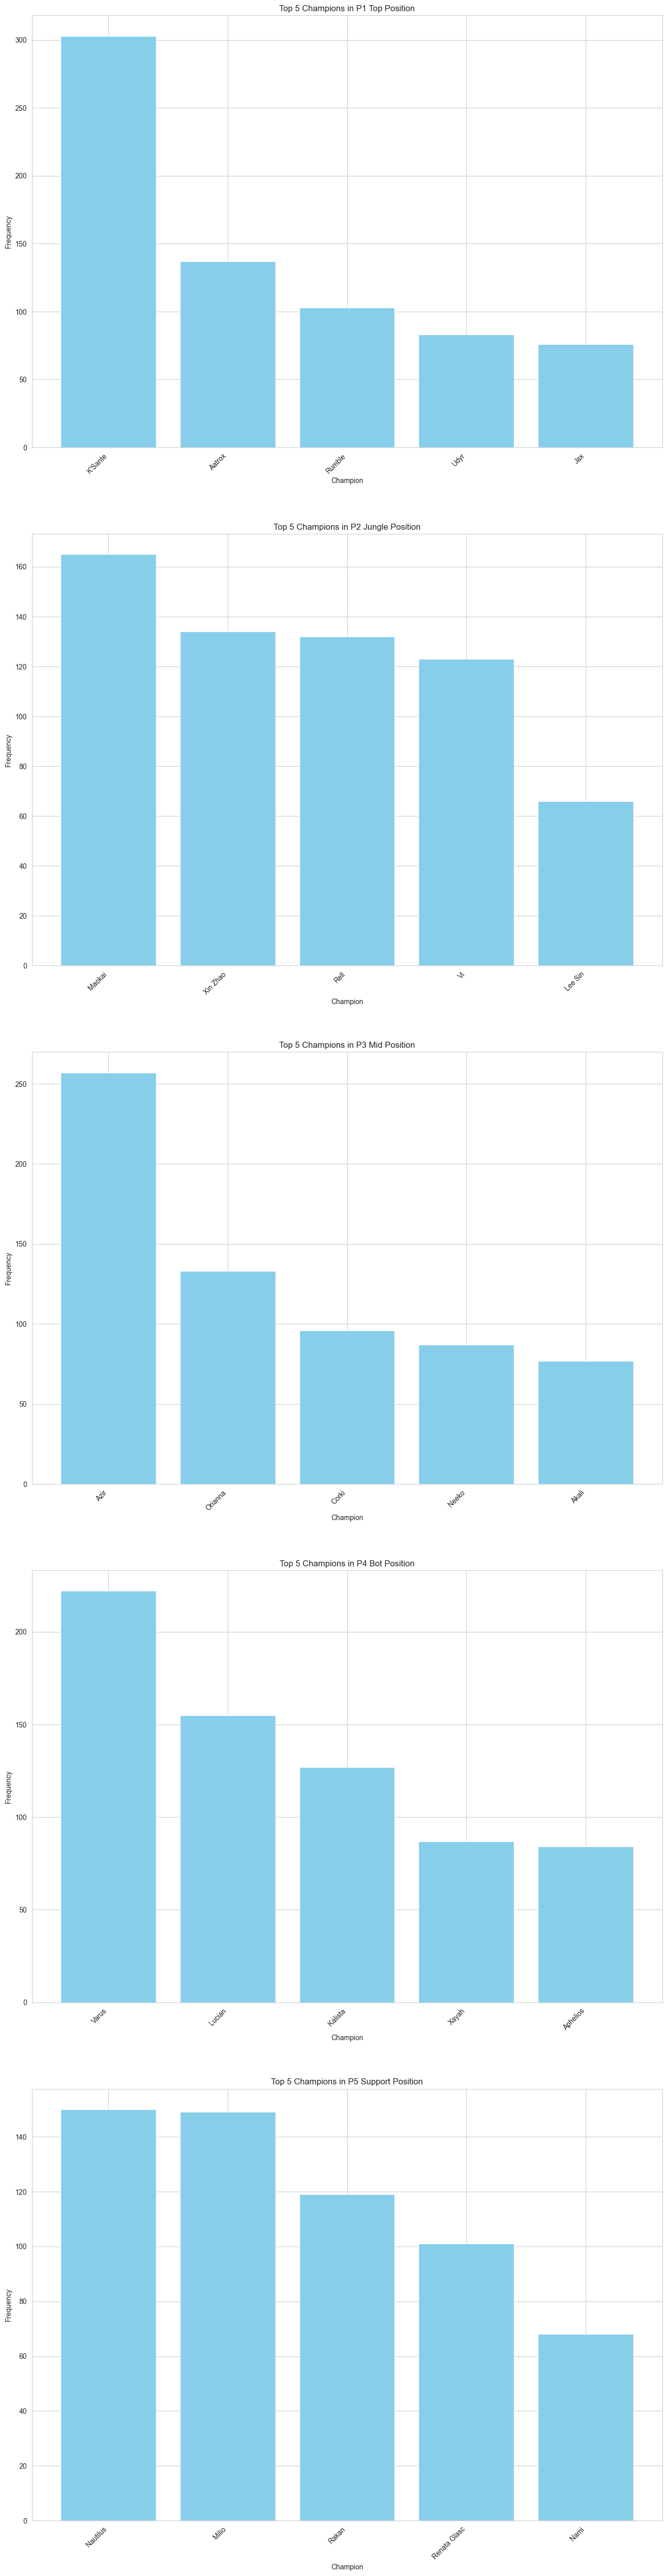

In [313]:
# Assuming 'combined_dataframe' is the name of your DataFrame
# Assuming you have already combined your dataframes and stored them in 'combined_dataframe'

# Define positions
positions = ['P1 Top', 'P2 Jungle', 'P3 Mid', 'P4 Bot', 'P5 Support']

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(16, 64))

# Loop through positions and plot
for i, pos in enumerate(positions):
    # Count the occurrences of each champion in the current position
    top_10_champions = combined_dataframe[pos].value_counts().head(5)
    
    # Plotting
    axs[i].bar(top_10_champions.index, top_10_champions.values, color='skyblue')
    axs[i].set_title(f'Top 5 Champions in {pos} Position')
    axs[i].set_xlabel('Champion')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=45)

    axs[i].set_xticks(range(len(top_10_champions.index)))
    axs[i].set_xticklabels(top_10_champions.index, rotation=45, ha='right')

# Adjust layout
plt.show()

---

### Win Rate Predictor Based on Champion Class and Position

In [314]:

# 2024_LoL_esports_match_data_from_OraclesElixir_gamedata_v4.csv
all_data = pd.read_csv('datasets/2024_LoL_esports_match_data_from_OraclesElixir_gamedata.csv', sep=',')
all_data.head()

clean_data = pd.DataFrame(all_data[['t1_result', 't2_result', 't1p1_champion', 't1p2_champion', 't1p3_champion', 't1p4_champion', 't1p5_champion', 't2p1_champion', 't2p2_champion', 't2p3_champion', 't2p4_champion', 't2p5_champion']])
clean_data.head()

# Response
team1 = pd.DataFrame(clean_data[['t1_result', 't1p1_champion', 't1p2_champion', 't1p3_champion', 't1p4_champion', 't1p5_champion']])
# Predictor
team2 = pd.DataFrame(clean_data[['t2_result', 't2p1_champion', 't2p2_champion', 't2p3_champion', 't2p4_champion', 't2p5_champion']])

team1.columns = ['result', 'p1', 'p2', 'p3', 'p4', 'p5']
team2.columns = ['result', 'p1', 'p2', 'p3', 'p4', 'p5']

all_team = pd.concat([team1, team2], ignore_index=True)
display(all_team)

# ------------------------------------------------------------------------------

# LOL-Champions.csv
champion_data = pd.read_csv('datasets/LoL-Champions.csv')
clean_champion_data = pd.DataFrame(champion_data[['Name', 'Class']])

# ------------------------------------------------------------------------------

# Merging both data sets
merged_data = pd.merge(all_team, clean_champion_data, left_on='p1', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'p1_class'}, inplace=True)
merged_data.drop('Name', axis=1, inplace=True)

merged_data = pd.merge(merged_data, clean_champion_data, left_on='p2', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'p2_class'}, inplace=True)
merged_data.drop('Name', axis=1, inplace=True)

merged_data = pd.merge(merged_data, clean_champion_data, left_on='p3', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'p3_class'}, inplace=True)
merged_data.drop('Name', axis=1, inplace=True)

merged_data = pd.merge(merged_data, clean_champion_data, left_on='p4', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'p4_class'}, inplace=True)
merged_data.drop('Name', axis=1, inplace=True)

merged_data = pd.merge(merged_data, clean_champion_data, left_on='p5', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'p5_class'}, inplace=True)
merged_data.drop('Name', axis=1, inplace=True)

columns_order = ['result', 'p1', 'p1_class', 'p2', 'p2_class', 'p3', 'p3_class', 'p4', 'p4_class', 'p5', 'p5_class']
final_clean_team_data = merged_data[columns_order]

display(merged_data)

# ------------------------------------------------------------------------------

# Prediction

# y = pd.DataFrame(final_clean_team_data[['p1_class', 'p2_class', 'p3_class', 'p4_class', 'p5_class']])
# X = pd.DataFrame(final_clean_team_data[['result', 'p1_class', 'p2_class', 'p3_class', 'p4_class', 'p5_class']])

X = pd.DataFrame(final_clean_team_data[['p1_class', 'p2_class', 'p3_class', 'p4_class', 'p5_class']])
y = pd.DataFrame(final_clean_team_data[['result']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)



,result,p1,p2,p3,p4,p5
0,1,Jax,Bel'Veth,Neeko,Caitlyn,Lux
1,1,Udyr,Xin Zhao,Azir,Kalista,Renata Glasc
2,1,Zac,Vi,Azir,Senna,Maokai
3,1,Aatrox,Jax,Hwei,Kalista,Nautilus
4,1,Rumble,Maokai,Tristana,Lucian,Milio
...,...,...,...,...,...,...
2041,1,Gnar,Rell,Kai'Sa,Varus,Renata Glasc
2042,1,K'Sante,Maokai,LeBlanc,Kalista,Zyra
2043,1,K'Sante,Lee Sin,Azir,Senna,Nautilus
2044,1,K'Sante,Jax,Orianna,Kalista,Rell


,result,p1,p2,p3,p4,p5,p1_class,p2_class,p3_class,p4_class,p5_class
0,1,Jax,Bel'Veth,Neeko,Caitlyn,Lux,Warrior,Warrior,Mage,Marksman,Mage
1,1,Udyr,Xin Zhao,Azir,Kalista,Renata Glasc,Warrior,Warrior,Mage,Marksman,Support
2,1,Zac,Vi,Azir,Senna,Maokai,Tank-Warrior,Warrior,Mage,Marksman-Support,Tank
3,1,Aatrox,Jax,Hwei,Kalista,Nautilus,Warrior,Warrior,Mage,Marksman,Tank-Support
4,1,Rumble,Maokai,Tristana,Lucian,Milio,Mage-Warrior,Tank,Marksman,Marksman,Support
...,...,...,...,...,...,...,...,...,...,...,...
2041,1,Gnar,Rell,Kai'Sa,Varus,Renata Glasc,Warrior,Tank-Support,Marksman,Marksman,Support
2042,1,K'Sante,Maokai,LeBlanc,Kalista,Zyra,Tank-Warrior,Tank,Mage-Assassin,Marksman,Mage-Support
2043,1,K'Sante,Lee Sin,Azir,Senna,Nautilus,Tank-Warrior,Warrior-Assassin,Mage,Marksman-Support,Tank-Support
2044,1,K'Sante,Jax,Orianna,Kalista,Rell,Tank-Warrior,Warrior,Mage,Marksman,Tank-Support


In [315]:
X_train.describe()
y_train.describe()

,result
count,1534.000000
mean,0.494785
std,0.500136
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [316]:
# method 1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

categorical_columns = ['p1_class', 'p2_class', 'p3_class', 'p4_class', 'p5_class']

X = pd.DataFrame(final_clean_team_data[['p1_class', 'p2_class', 'p3_class', 'p4_class', 'p5_class']])
y = pd.DataFrame(final_clean_team_data[['result']])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Append regression model to preprocessing pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.052748105056714456
Mean Squared Error (MSE) 	: 0.2368073110969386

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.058056494414701065
Mean Squared Error (MSE) 	: 0.2644134162633384



In [317]:
# method 2

# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

data_encoded = pd.get_dummies(final_clean_team_data)

X = data_encoded.drop('result', axis=1)
y = data_encoded['result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.14370607848736872
Mean Squared Error (MSE) 	: 0.21406836148287672

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -1.4625836826620206e+25
Mean Squared Error (MSE) 	: 3.6550670984502575e+24



Both version of linear regresion has negative Explained Variance. This could mean the following:
- Team composition & result (win/loss) is not linear
- Data is overfitted
- Inadequate Features
- Data Leakage

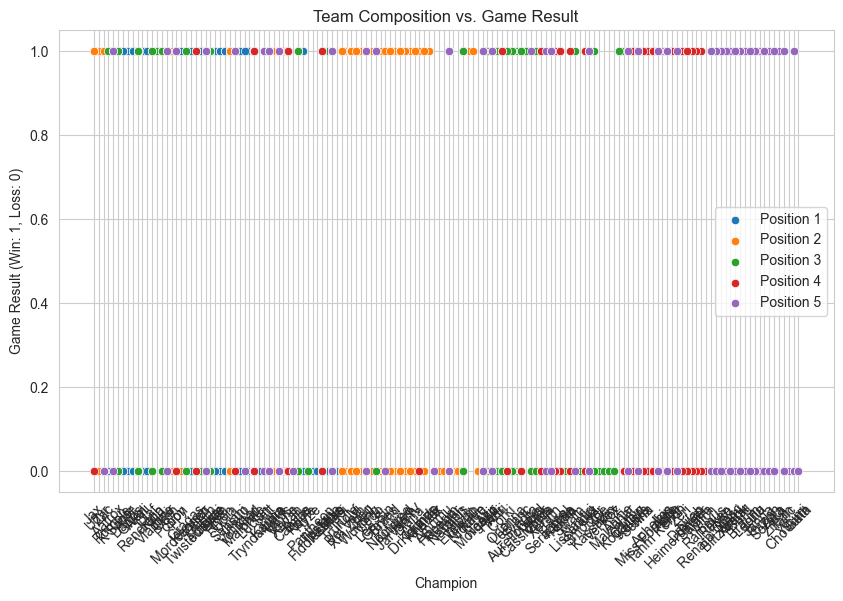

In [318]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='p1', y='result', data=merged_data, label='Position 1')
sns.scatterplot(x='p2', y='result', data=merged_data, label='Position 2')
sns.scatterplot(x='p3', y='result', data=merged_data, label='Position 3')
sns.scatterplot(x='p4', y='result', data=merged_data, label='Position 4')
sns.scatterplot(x='p5', y='result', data=merged_data, label='Position 5')

plt.title('Team Composition vs. Game Result')
plt.xlabel('Champion')
plt.ylabel('Game Result (Win: 1, Loss: 0)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

From the above diagram, we learn that Team composition & result (win/loss) is not linear.

After doing some research, we could use Random Trees predicting Binary values.

We will show that next.

---

## Problem Definition 3???

In [319]:
# One-hot encode champion columns
champion_columns = ['t1p1_champion', 't1p2_champion', 't1p3_champion', 't1p4_champion', 't1p5_champion',
                    't2p1_champion', 't2p2_champion', 't2p3_champion', 't2p4_champion', 't2p5_champion','t1p1_class', 't1p2_class', 't1p3_class', 't1p4_class', 't1p5_class',
                    't2p1_class', 't2p2_class', 't2p3_class', 't2p4_class', 't2p5_class']


merged_data_loldataQtn2_columnsUpdated = pd.read_csv('datasets/cleaned_dataset_matchWinner.csv', sep=',')


merged_data_loldataQtn2_columnsUpdated = pd.get_dummies(merged_data_loldataQtn2_columnsUpdated, columns=champion_columns)

# Convert matchWinner values to numeric
# merged_data_loldataQtn2_columnsUpdated['matchWinner'] = merged_data_loldataQtn2_columnsUpdated['matchWinner'].astype(int)

# Split the data into features (X) and target (y)
X = merged_data_loldataQtn2_columnsUpdated.drop('matchWinner', axis=1)
y = merged_data_loldataQtn2_columnsUpdated['matchWinner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=1)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9658536585365853


In [320]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17a210110>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16e457b30>})

In [321]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 243}


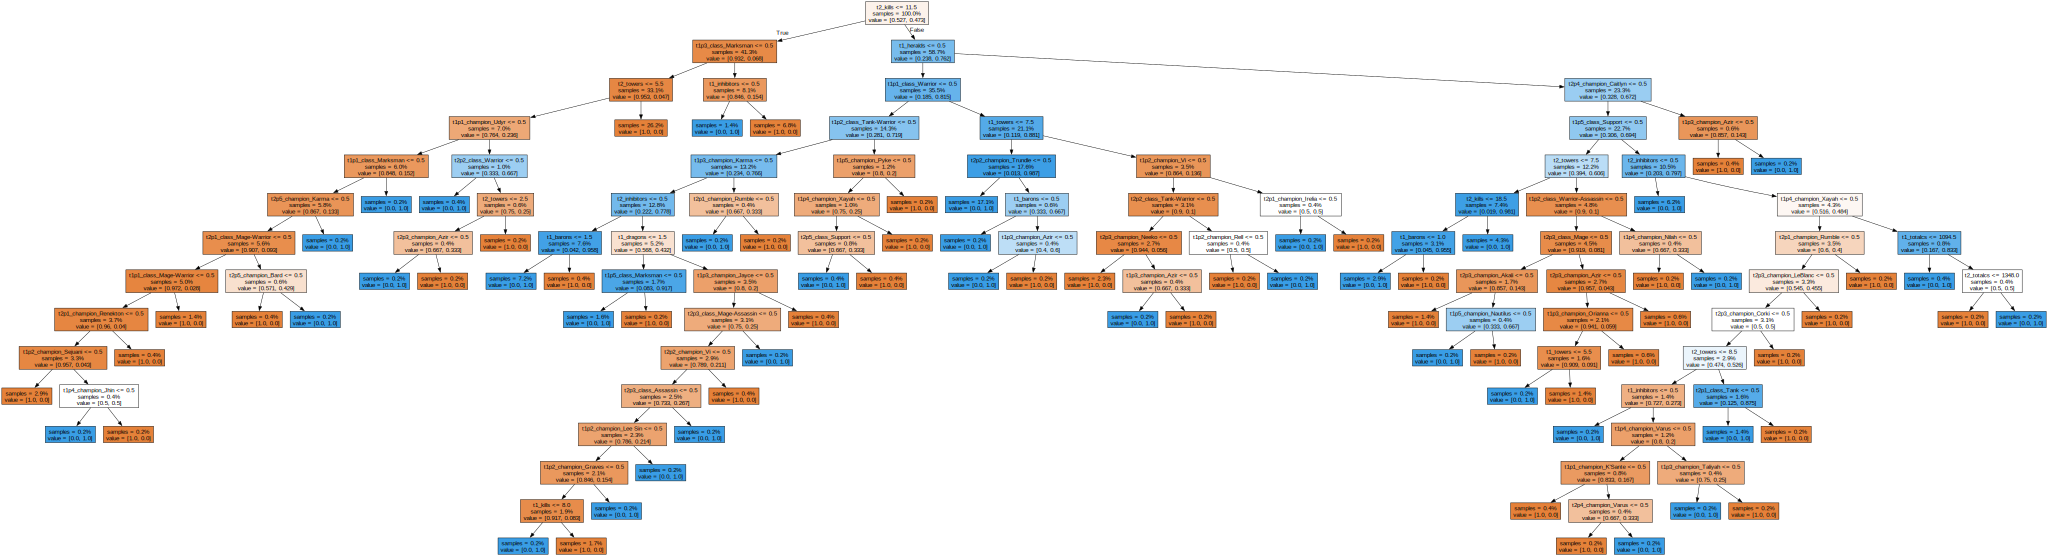

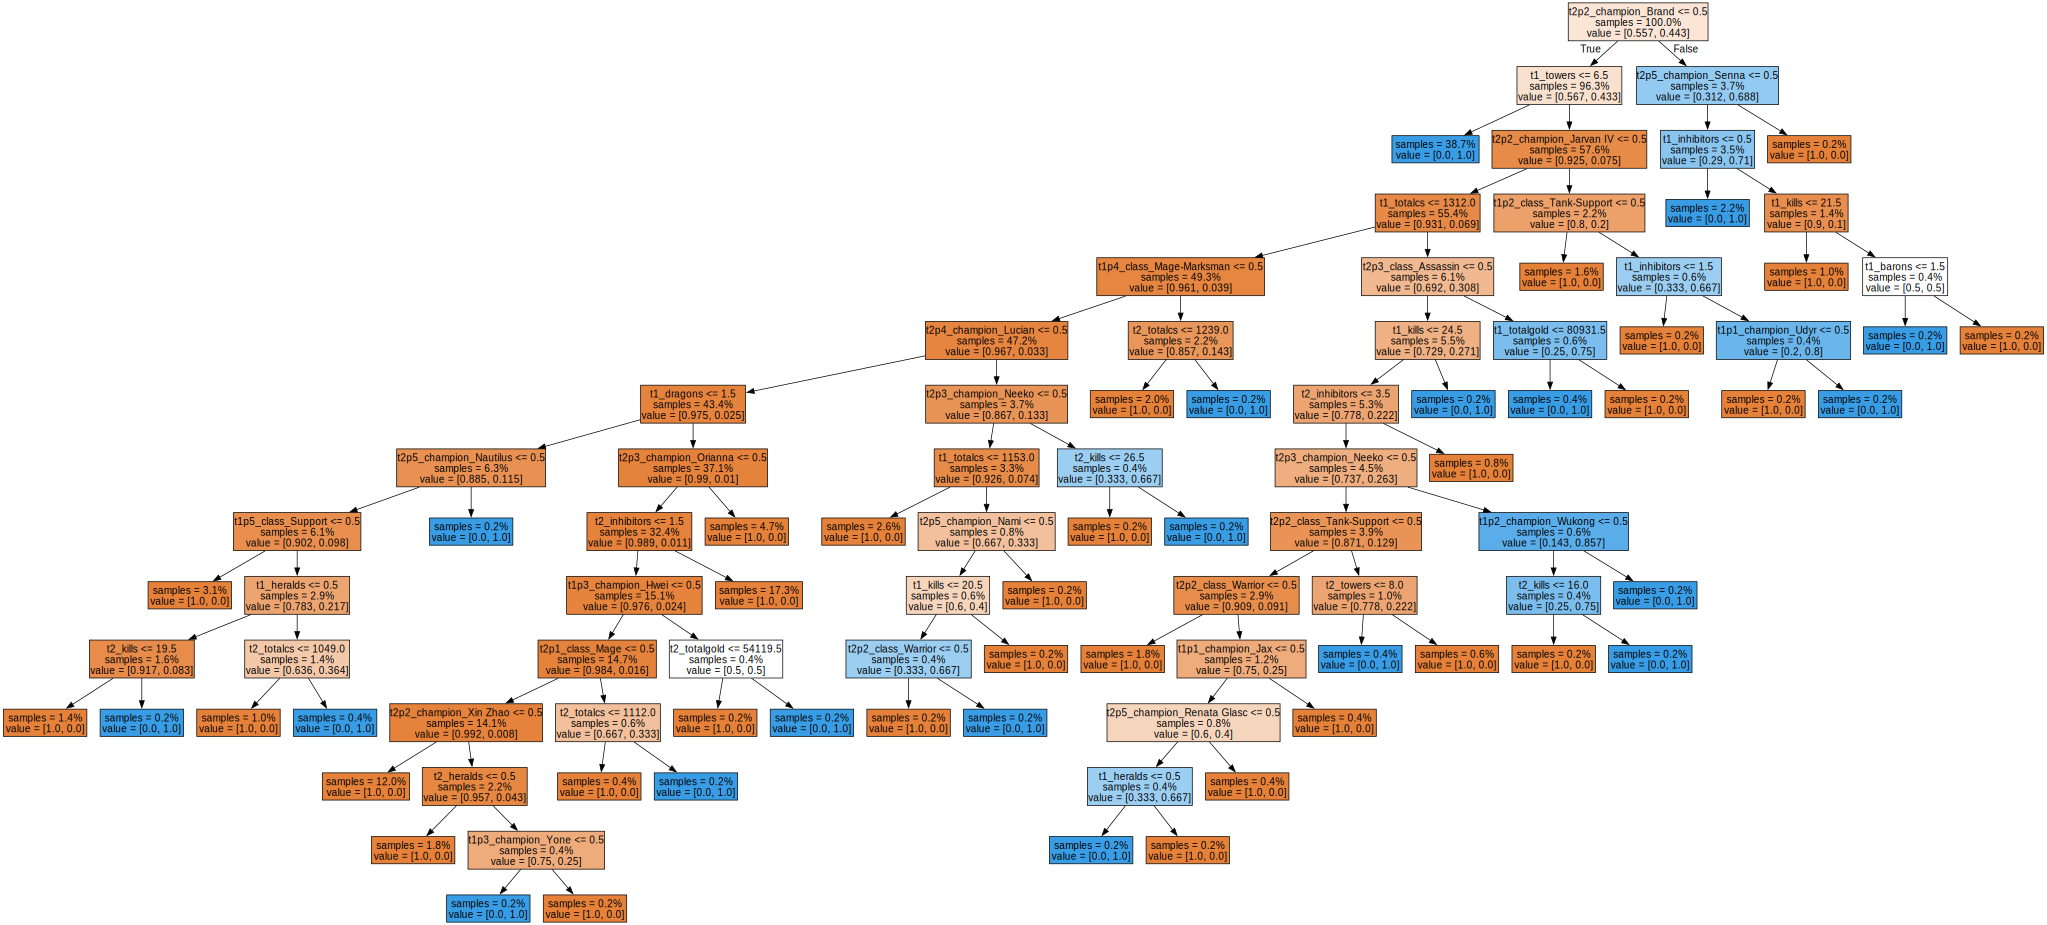

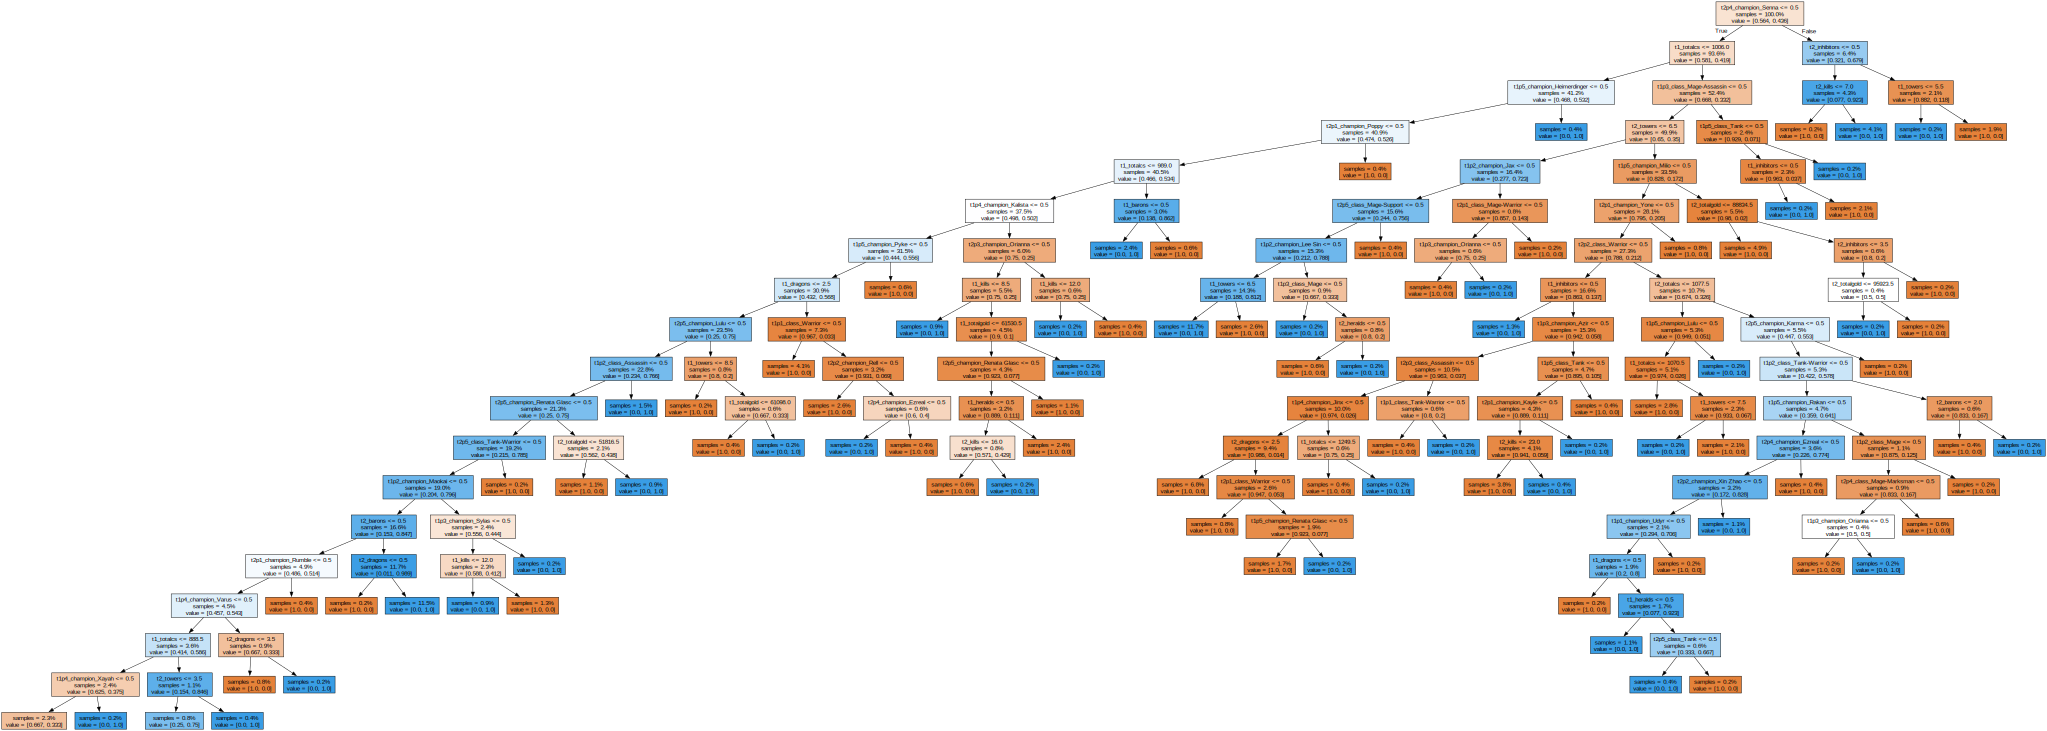

In [322]:
# Export the first three decision trees from the forest

# Get the best hyperparameters from the best model
best_hyperparameters = best_rf.get_params()

# Retrieve the value of max_depth
max_depth = best_hyperparameters['max_depth']


for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=max_depth, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


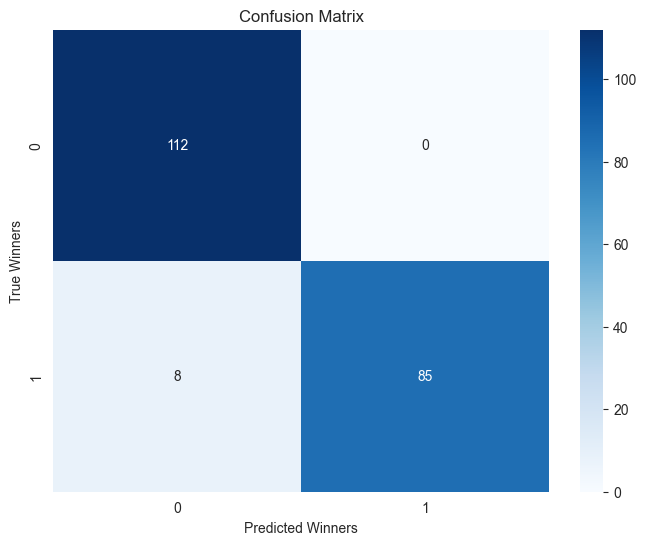

In [323]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Winners')
plt.ylabel('True Winners')
plt.title('Confusion Matrix')
plt.show()

In [324]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
# f-score

Accuracy: 0.9609756097560975
Precision: 0.9333333333333333
Recall: 1.0


---

## Exploration - Problem Definition 2

What is the most optimal and suitable game variable in predicting the total combined gold value? Amongst these variables total kills, total minion score, neutral objectives and structures taken down.

The table below shows the variables and their corresponding columns in the datasets.

| Variables | Columns in Dataset |
| - | - |
| Total Combined Gold | `t1_totalgold`, `t2_totalgold` |
| Total Kills | `t1_kills`, `t2_kills` |
| Total Minion Score | `t1_totalcs`, `t2_totalcs` |
| Neutral Objectives | `t1_barons`, `t2_barons`, `t1_dragons`, `t2_dragons`, `t1_heralds`, `t2_heralds` |
| Structures | `t1_towers`, `t2_towers`, `t1_inhibitors`, `t2_inhibitors` |

### Processing Cleaned Dataset

Processing the cleaned dataset for this problem definition.

In [325]:
desired_columns_problem_2 = ['t1_totalgold', 't2_totalgold', 't1_barons', 't2_barons', 't1_dragons', 't2_dragons', 't1_heralds', 't2_heralds', 't1_towers', 't2_towers', 't1_inhibitors', 't2_inhibitors', 't1_kills', 't2_kills', 't1_totalcs', 't2_totalcs']

problem_2_data = pd.DataFrame(cleaned_dataset, columns=desired_columns_problem_2)
display(problem_2_data)

,t1_totalgold,t2_totalgold,t1_barons,t2_barons,t1_dragons,t2_dragons,t1_heralds,t2_heralds,t1_towers,t2_towers,t1_inhibitors,t2_inhibitors,t1_kills,t2_kills,t1_totalcs,t2_totalcs
0,51091,30710,1,0,2,1,0,0,10,0,2,0,21,3,786,588
1,49451,32225,1,0,3,0,1,0,9,9,1,1,15,3,826,646
2,50055,32273,0,0,3,0,1,0,10,10,2,2,21,2,817,675
3,51601,32965,1,0,1,1,1,0,10,10,2,2,26,7,734,571
4,47569,33183,0,0,2,1,1,0,9,9,2,2,20,3,808,676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,92016,93497,3,0,3,4,1,0,7,7,0,0,25,23,1452,1652
1019,92082,93518,2,0,3,4,0,0,7,7,2,2,8,12,1735,1709
1020,87286,93730,1,1,4,3,1,0,5,5,2,2,22,25,1395,1423
1021,92168,95579,3,0,3,4,0,0,8,8,2,2,25,33,1424,1504


Further processing to combine the team 1 (start with t1) and team 2 (start with t2) columns into a single column (example `t1_totalgold` and `t2_totalgold` into `totalgold`).

In [326]:
# combine team 1 and team 2 values for each column
for column in problem_2_data.columns:
    if column.startswith('t1'):
        corresponding_column = 't2' + column[2:]
        if corresponding_column in problem_2_data.columns:
            problem_2_data[column] += problem_2_data[corresponding_column]

# drop team 2 columns
problem_2_data_processed = problem_2_data[[col for col in problem_2_data.columns if not col.startswith('t2')]]

# rename columns by removing 't1' prefix
problem_2_data_processed.columns = [col.replace('t1_', '') for col in problem_2_data_processed.columns]

# delete problem_2_data dataframe to release memory
del problem_2_data

# create a copy of problem_2_data_processed
problem_2_data = problem_2_data_processed.copy()

# combine barons, dragons, and heralds into neutralObjectives in problem_2_data
problem_2_data['neutralObjectives'] = problem_2_data_processed['barons'] + problem_2_data_processed['dragons'] + problem_2_data_processed['heralds']

# combine towers and inhibitors into structures in problem_2_data
problem_2_data['structures'] = problem_2_data_processed['towers'] + problem_2_data_processed['inhibitors']

# drop barons, dragons, heralds, towers and inhibitors from problem_2_data
problem_2_data.drop(columns=['barons', 'dragons', 'heralds', 'towers', 'inhibitors'], inplace=True)

# delete problem_2_data_processed dataframe to release memory
del problem_2_data_processed

display(problem_2_data)

,totalgold,kills,totalcs,neutralObjectives,structures
0,81801,24,1374,4,12
1,81676,18,1472,5,20
2,82328,23,1492,4,24
3,84566,33,1305,4,24
4,80752,23,1484,4,22
...,...,...,...,...,...
1018,185513,48,3104,11,14
1019,185600,20,3444,9,18
1020,181016,47,2818,10,14
1021,187747,58,2928,10,20


### Box Plot, Histograms and Violin Plot

Plotting box plot, histograms and violin plot to better understand the distribution of the data points.

Creating dataframes from the columns related to the variables mentioned above.

In [327]:
problem_2_data_totalgold = pd.DataFrame(problem_2_data['totalgold'])
problem_2_data_kills = pd.DataFrame(problem_2_data['kills'])
problem_2_data_totalcs = pd.DataFrame(problem_2_data['totalcs'])
problem_2_data_neutralObjectives = pd.DataFrame(problem_2_data['neutralObjectives'])
problem_2_data_structures = pd.DataFrame(problem_2_data['structures'])

#### Variable 'totalgold'

<Axes: >

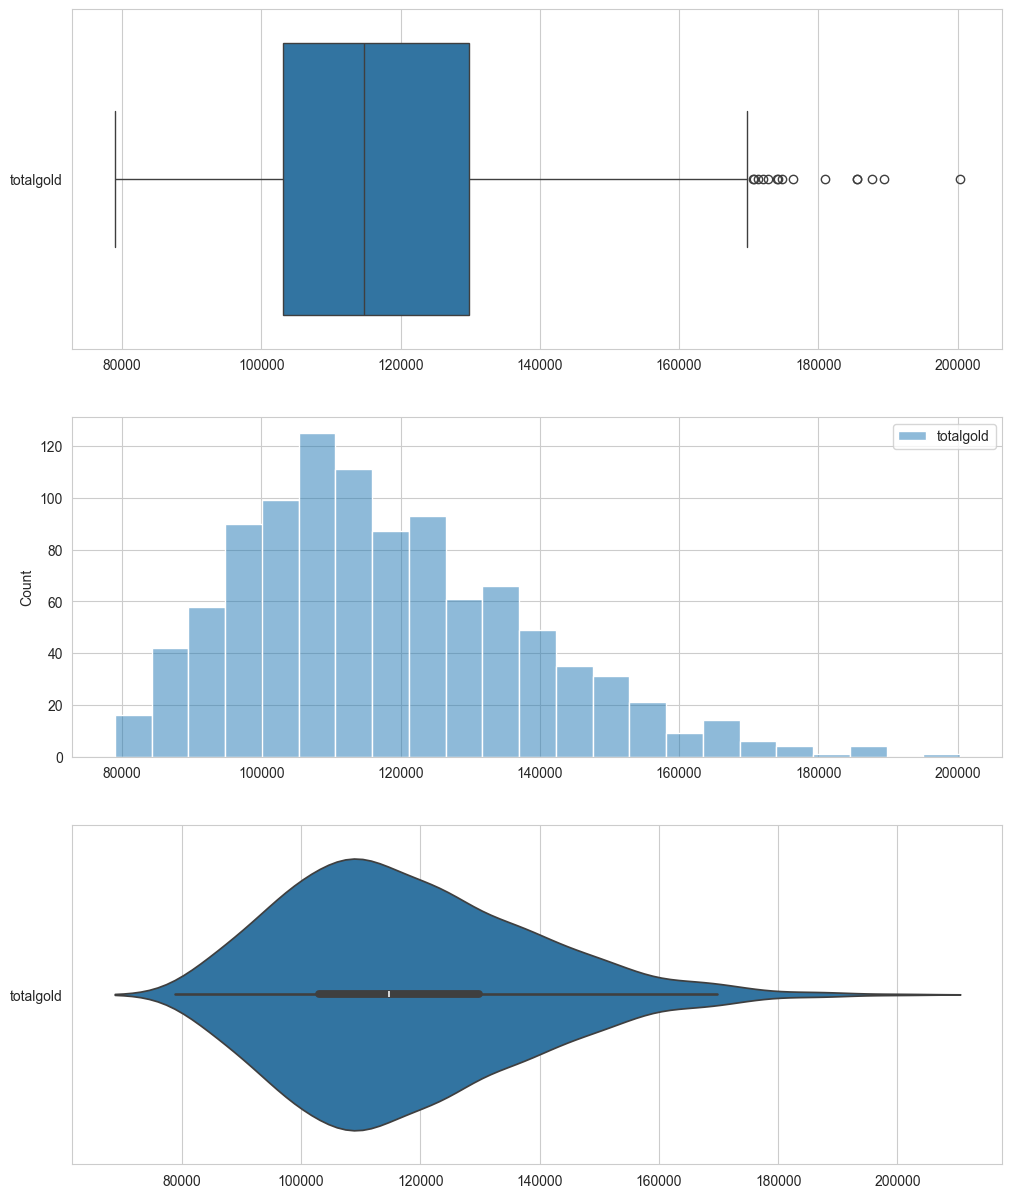

In [328]:
# set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(12, 15))

# plot the basic uni-variate figures for totalgold
sns.boxplot(data = problem_2_data_totalgold, orient = "h", ax = axes[0])
sns.histplot(data = problem_2_data_totalgold, ax = axes[1])
sns.violinplot(data = problem_2_data_totalgold, orient = "h", ax = axes[2])

#### Variable 'kills'

<Axes: >

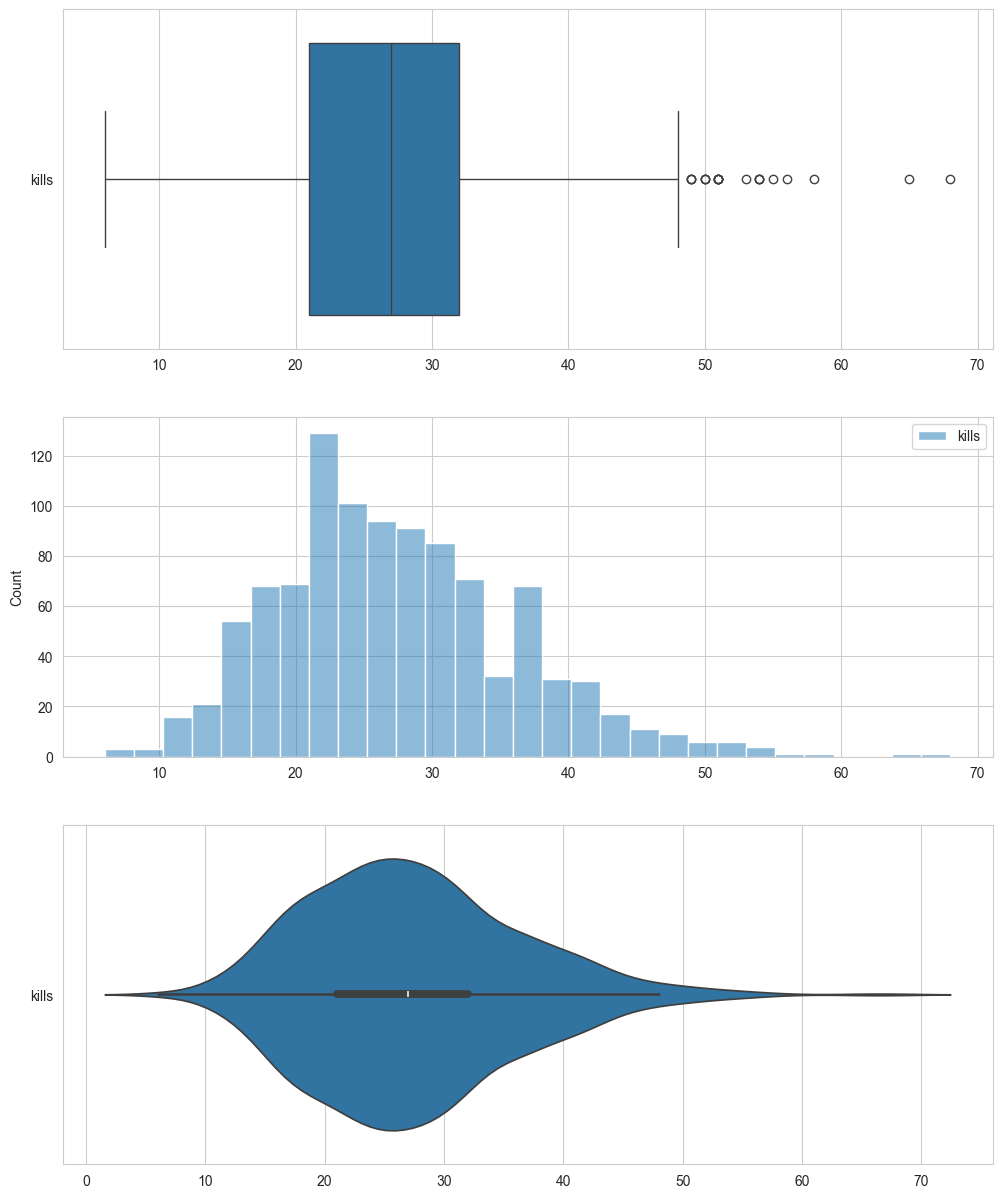

In [329]:
# set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(12, 15))

# plot the basic uni-variate figures for kills
sns.boxplot(data = problem_2_data_kills, orient = "h", ax = axes[0])
sns.histplot(data = problem_2_data_kills, ax = axes[1])
sns.violinplot(data = problem_2_data_kills, orient = "h", ax = axes[2])


#### Variable 'totalcs'

<Axes: >

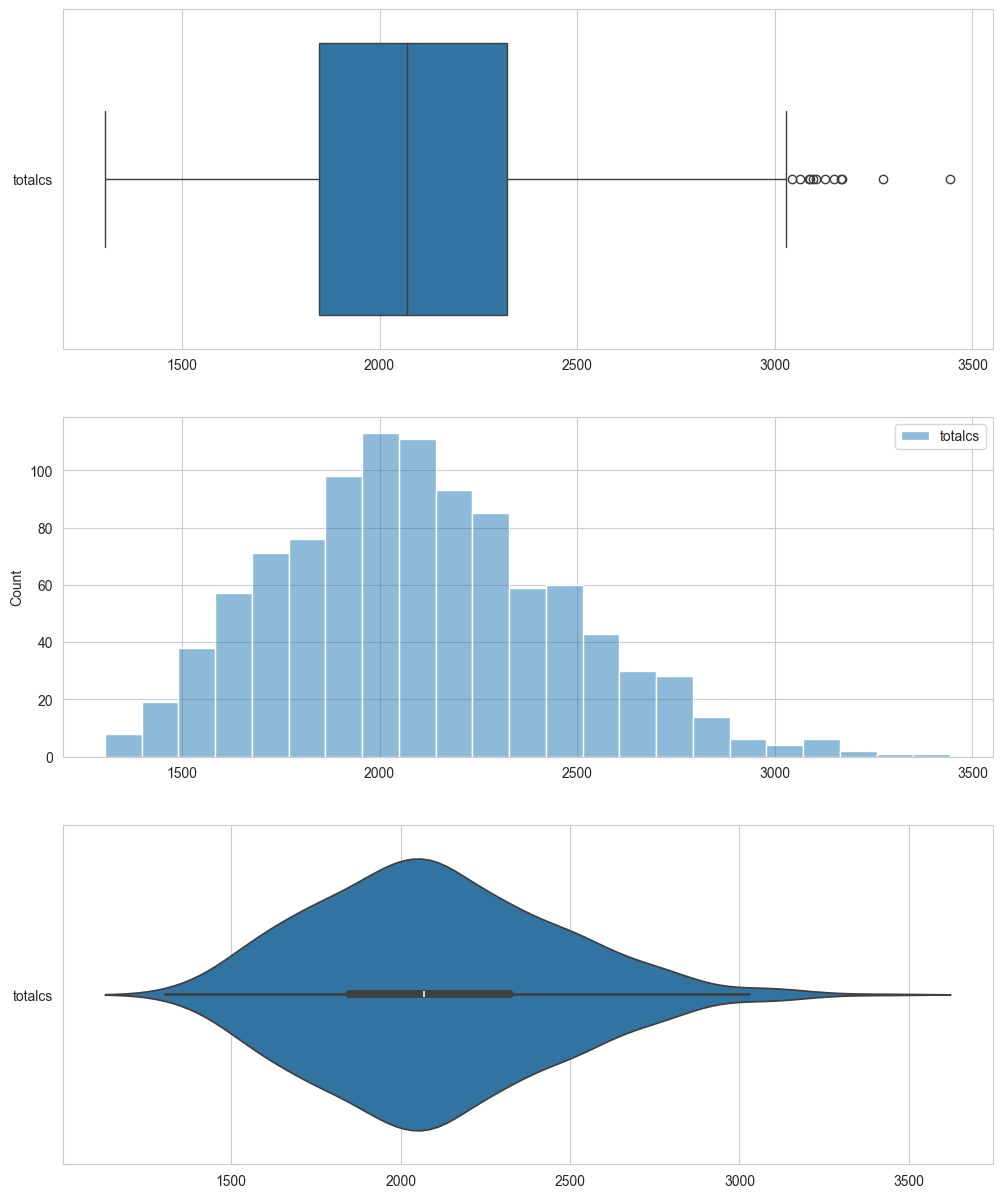

In [330]:
# set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(12, 15))

# plot the basic uni-variate figures for totalcs
sns.boxplot(data = problem_2_data_totalcs, orient = "h", ax = axes[0])
sns.histplot(data = problem_2_data_totalcs, ax = axes[1])
sns.violinplot(data = problem_2_data_totalcs, orient = "h", ax = axes[2])


#### Variable 'neutralObjectives'

<Axes: >

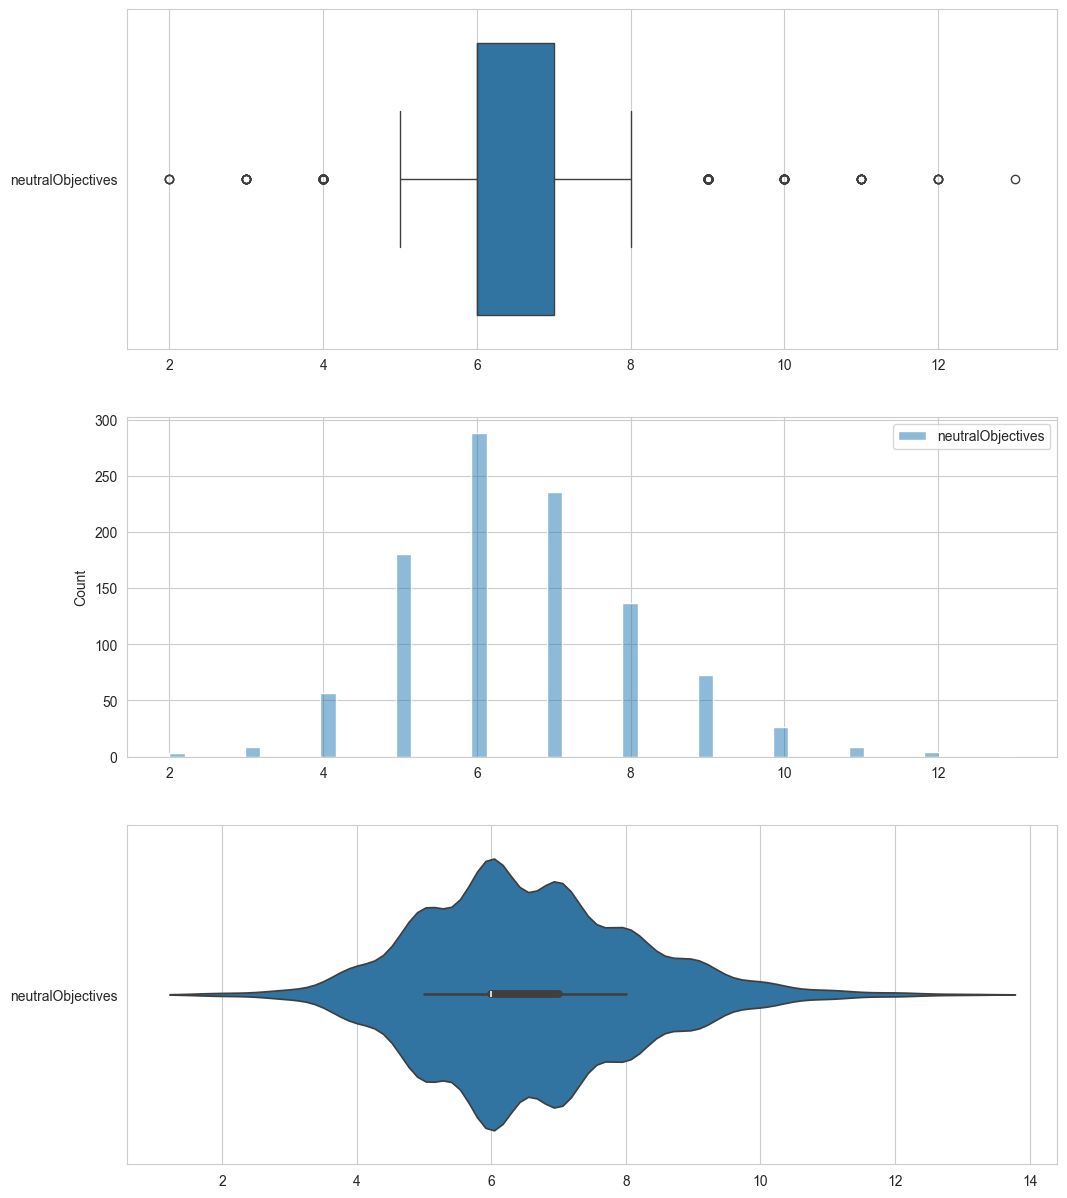

In [331]:
# set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(12, 15))

# plot the basic uni-variate figures for neutralObjectives
sns.boxplot(data = problem_2_data_neutralObjectives, orient = "h", ax = axes[0])
sns.histplot(data = problem_2_data_neutralObjectives, ax = axes[1])
sns.violinplot(data = problem_2_data_neutralObjectives, orient = "h", ax = axes[2])

#### Variable 'structures'

<Axes: >

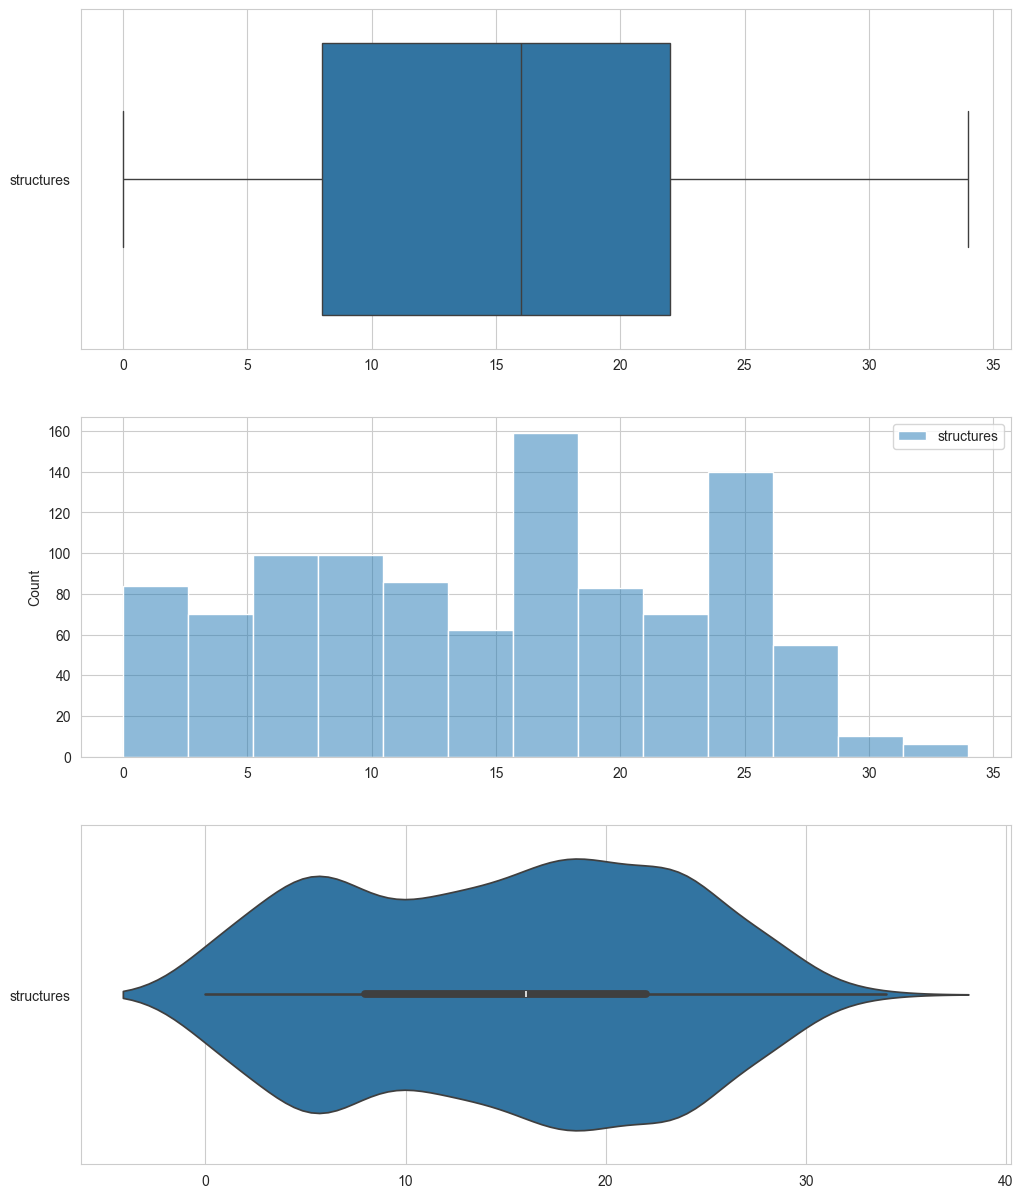

In [332]:
# set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(12, 15))

# plot the basic uni-variate figures for structures
sns.boxplot(data = problem_2_data_structures, orient = "h", ax = axes[0])
sns.histplot(data = problem_2_data_structures, ax = axes[1])
sns.violinplot(data = problem_2_data_structures, orient = "h", ax = axes[2])

### Joint Plot

Plotting joint plot to better understand the relationships between the totalgold and the other variables.

#### Variables 'totalgold' and 'kills'

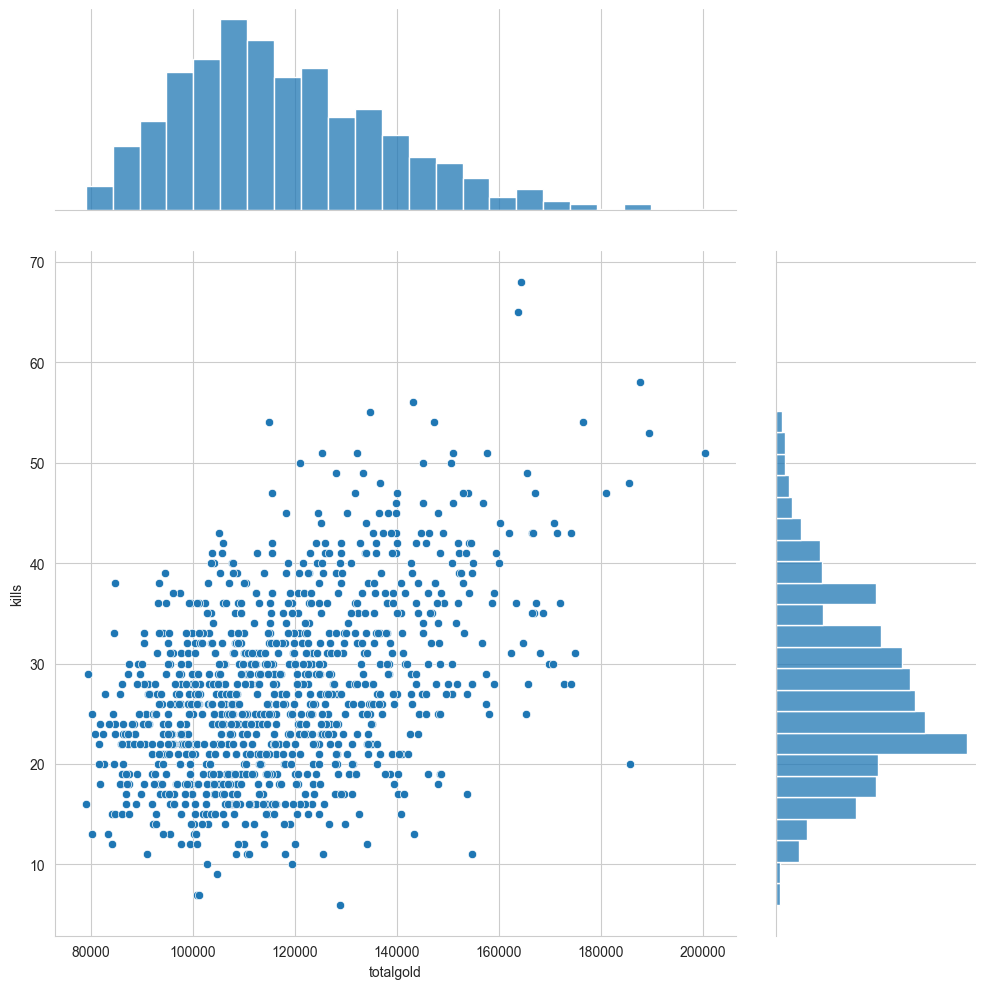

In [333]:
# create a joint dataframe by concatenating the two variables
problem_2_data_totalgold_kills = pd.concat([problem_2_data_totalgold, problem_2_data_kills], axis = 1).reindex(problem_2_data_totalgold.index)

# set the style of seaborn
sns.set_style("whitegrid")

# create the jointplot with adjusted height and aspect ratio
sns.jointplot(data=problem_2_data_totalgold_kills, x="totalgold", y="kills", height=10, ratio=3)

plt.show()

# delete dataframe to release memory
del problem_2_data_totalgold_kills

The scatter plot is showing data points that are clustedred around the middle-lower left area, showing that there are some relationship between 'totalgold' and 'kills', but it may not be a good predicter to predict 'totalgold'.

#### Variables 'totalgold' and 'totalcs'

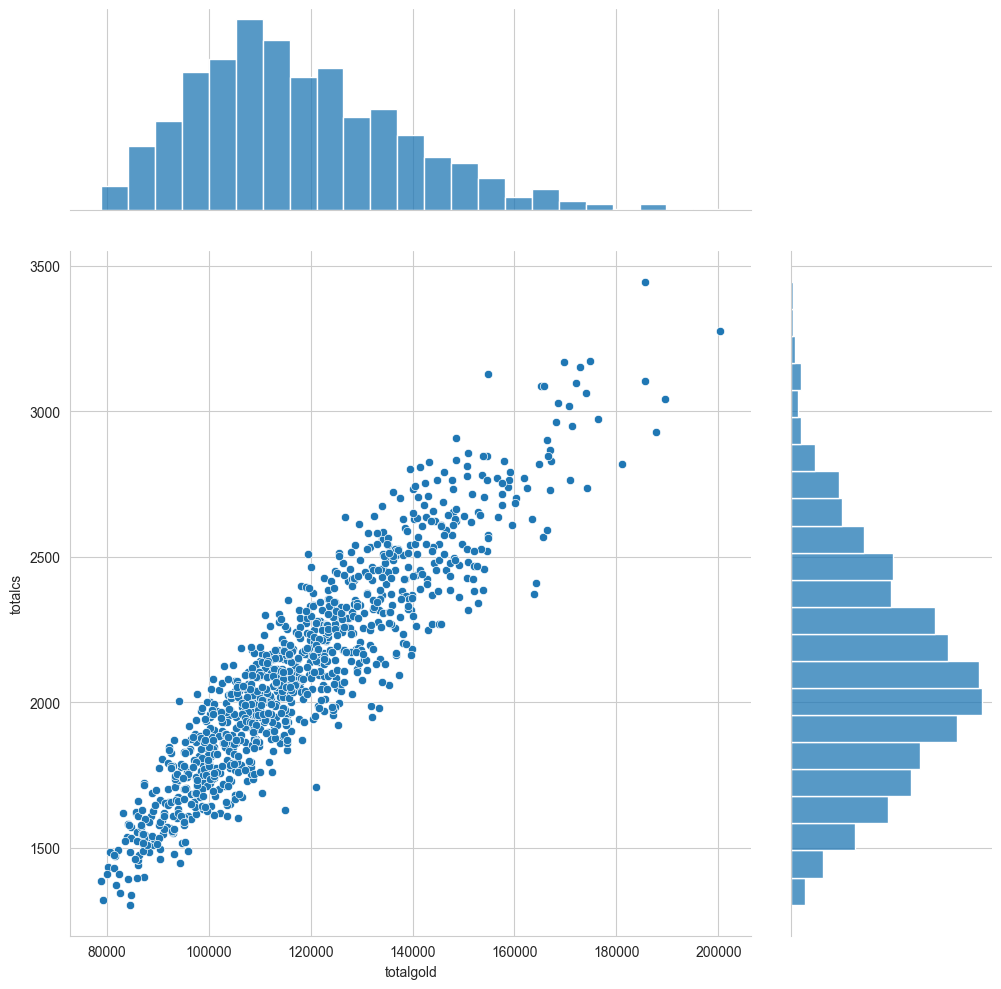

In [334]:
# create a joint dataframe by concatenating the two variables
problem_2_data_totalgold_totalcs = pd.concat([problem_2_data_totalgold, problem_2_data_totalcs], axis = 1).reindex(problem_2_data_totalgold.index)

# set the style of seaborn
sns.set_style("whitegrid")

# create the jointplot with adjusted height and aspect ratio
sns.jointplot(data=problem_2_data_totalgold_totalcs, x="totalgold", y="totalcs", height=10, ratio=3)

plt.show()

# delete dataframe to release memory
del problem_2_data_totalgold_totalcs

The scatter plot is showing data points that almost appear to be in a straight line, this shows the relationship between 'totalgold' and 'totalcs' are quite strong and 'totalcs' may be the a very good predicter for 'totalgold' when comapred to 'kills'.

#### Variables 'totalgold' and 'neutralObjectives'

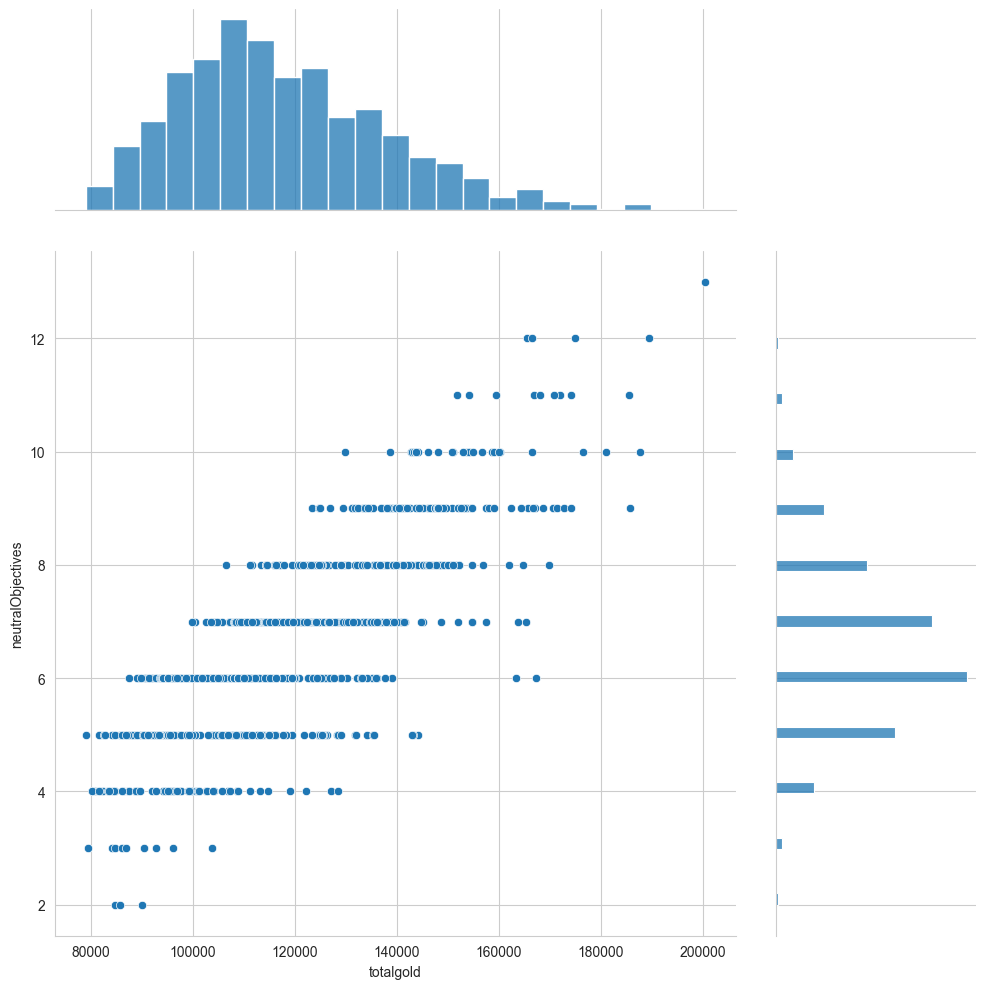

In [335]:
# create a joint dataframe by concatenating the two variables
problem_2_data_totalgold_neutralObjectives = pd.concat([problem_2_data_totalgold, problem_2_data_neutralObjectives], axis = 1).reindex(problem_2_data_totalgold.index)

# set the style of seaborn
sns.set_style("whitegrid")

# create the jointplot with adjusted height and aspect ratio
sns.jointplot(data=problem_2_data_totalgold_neutralObjectives, x="totalgold", y="neutralObjectives", height=10, ratio=3)

plt.show()

# delete dataframe to release memory
del problem_2_data_totalgold_neutralObjectives

The scatter plot is showing data points that appear to be heading towards the same direction in a straight line, but the data points on the x-axis is spread out very widely. It indicates that there are some relationship between 'totalgold' and 'neutralObjectives', but it may not be a good predicter to predict 'totalgold'. However, it appear to be a better predictor than 'kills'.

#### Variables 'totalgold' and 'structures'

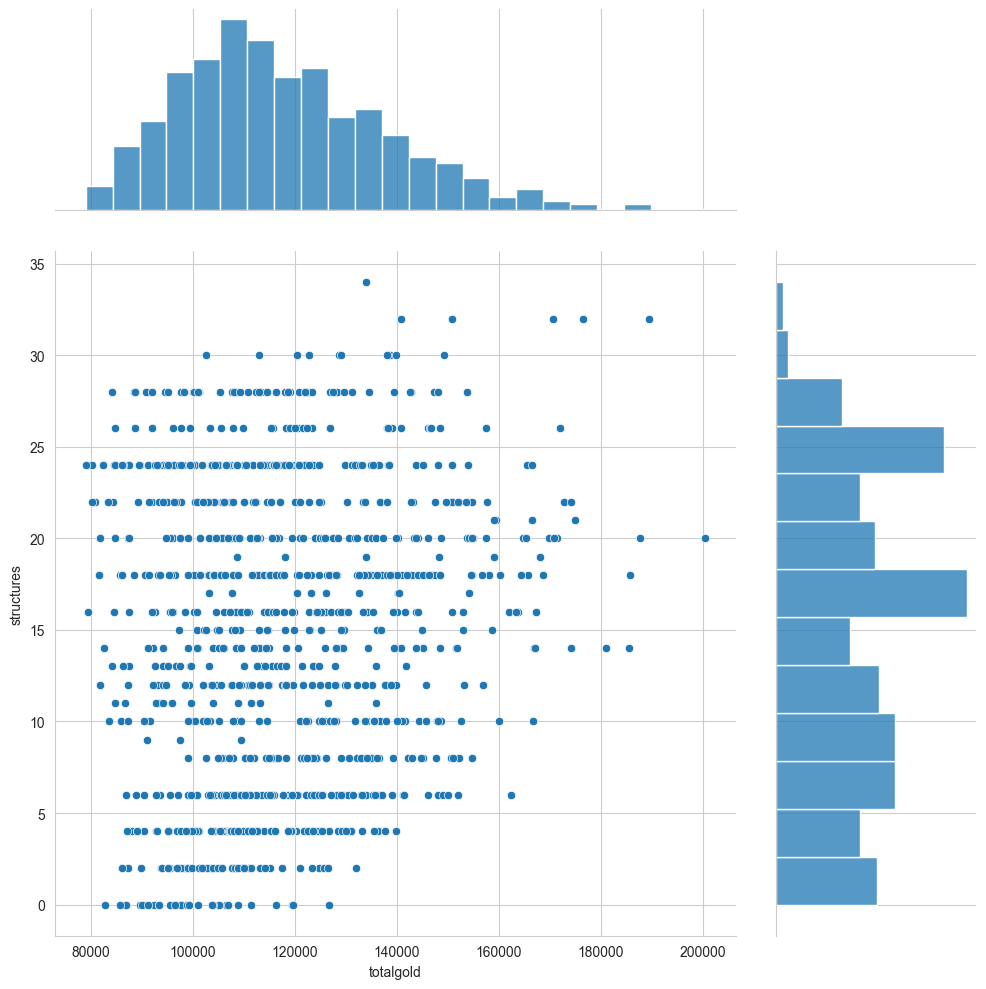

In [336]:
# create a joint dataframe by concatenating the two variables
problem_2_data_totalgold_structures = pd.concat([problem_2_data_totalgold, problem_2_data_structures], axis = 1).reindex(problem_2_data_totalgold.index)

# set the style of seaborn
sns.set_style("whitegrid")

# create the jointplot with adjusted height and aspect ratio
sns.jointplot(data=problem_2_data_totalgold_structures, x="totalgold", y="structures", height=10, ratio=3)

plt.show()

# delete dataframe to release memory
del problem_2_data_totalgold_structures

The scatter plot is showing data points that appear all over the plot. It shows that there is a very weak relationship between 'totalgold' and 'neutralObjectives', or almost none at all.

Out of the 4 variables, 'totalcs' appears to be the best predictor for 'totalgold'.

### Linear Regression

We will use linear regression to confirm out finding from joint plot above.

In [337]:
# import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Predict 'totalgold' Using 'kills'

| Predictor (X) | Response (y) |
| - | - |
| `kills` | `totalgold` |

Intercept of Regression 	: b =  [89758.12859471]
Coefficients of Regression 	: a =  [[1042.48875372]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1976015847255087
Mean Squared Error (MSE) 	: 331827322.6006975

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.24225495314296197
Mean Squared Error (MSE) 	: 304585263.17785674



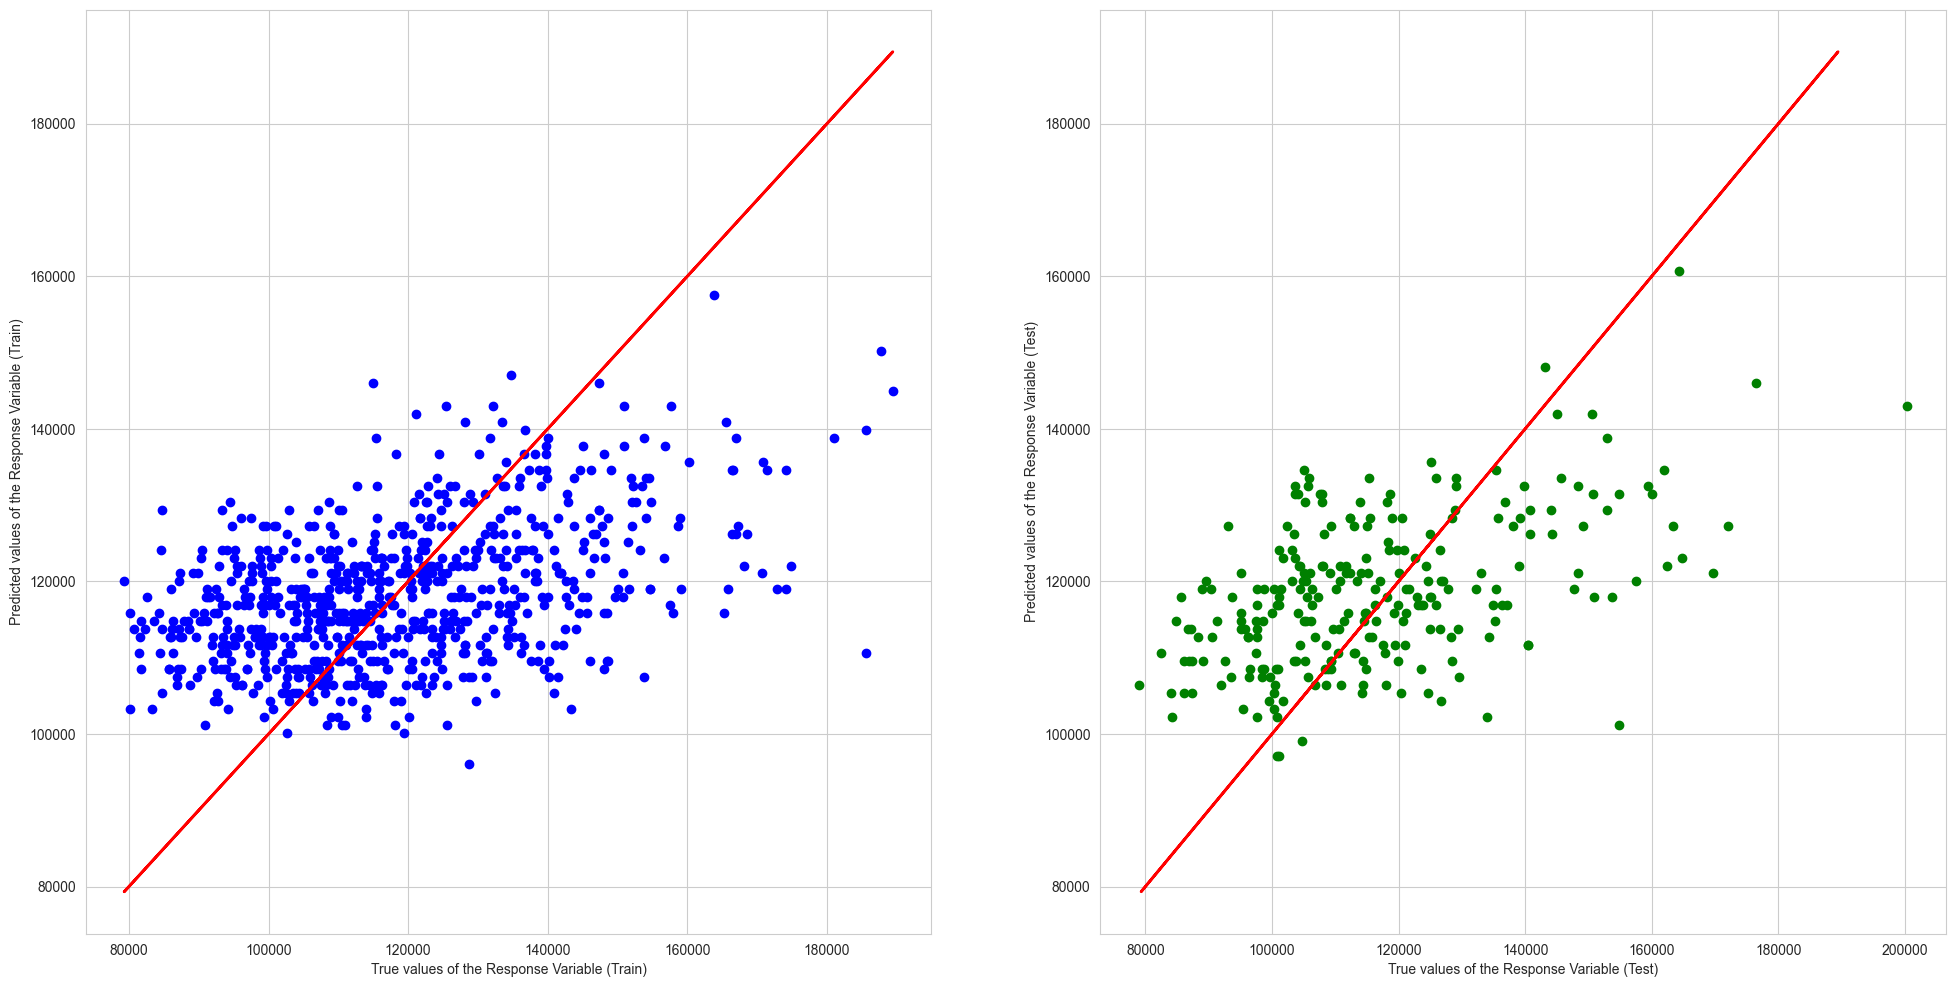

In [338]:
# splits data points into random train and test subsets
# but setting random_state for the markdown
X_train, X_test, y_train, y_test = train_test_split(problem_2_data_kills, problem_2_data_totalgold, test_size=0.25, random_state=100)

# linear regression using train data
linreg = LinearRegression() # create the linear regression object
linreg.fit(X_train, y_train) # train the linear regression model

# coefficients of the linear regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# predict totalgold values corresponding to kills
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# goodness of fit (on train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# goodness of fit (on test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# plot the predictions vs the true values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# train data
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, color = "red", linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

# test data
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_train, y_train, color = "red", linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

Both the explained variance and the mean squared error for both train and test dataset are similiar and consistent.

However, with a low explained variance (train: 0.197, test: 0.242) and high mean squared error (train: 331,827,322, test: 304,585,263), this shows that 'kills' is not a good predictor for 'totalgold'.

This is the same finding as the finding from the joint plot section above.

#### Predict 'totalgold' Using 'totalcs'

| Predictor (X) | Response (y) |
| - | - |
| `totalcs` | `totalgold` |

Intercept of Regression 	: b =  [7697.56784167]
Coefficients of Regression 	: a =  [[52.42796296]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8565367462438174
Mean Squared Error (MSE) 	: 59328416.50642273

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8390572889463042
Mean Squared Error (MSE) 	: 64692970.5527938



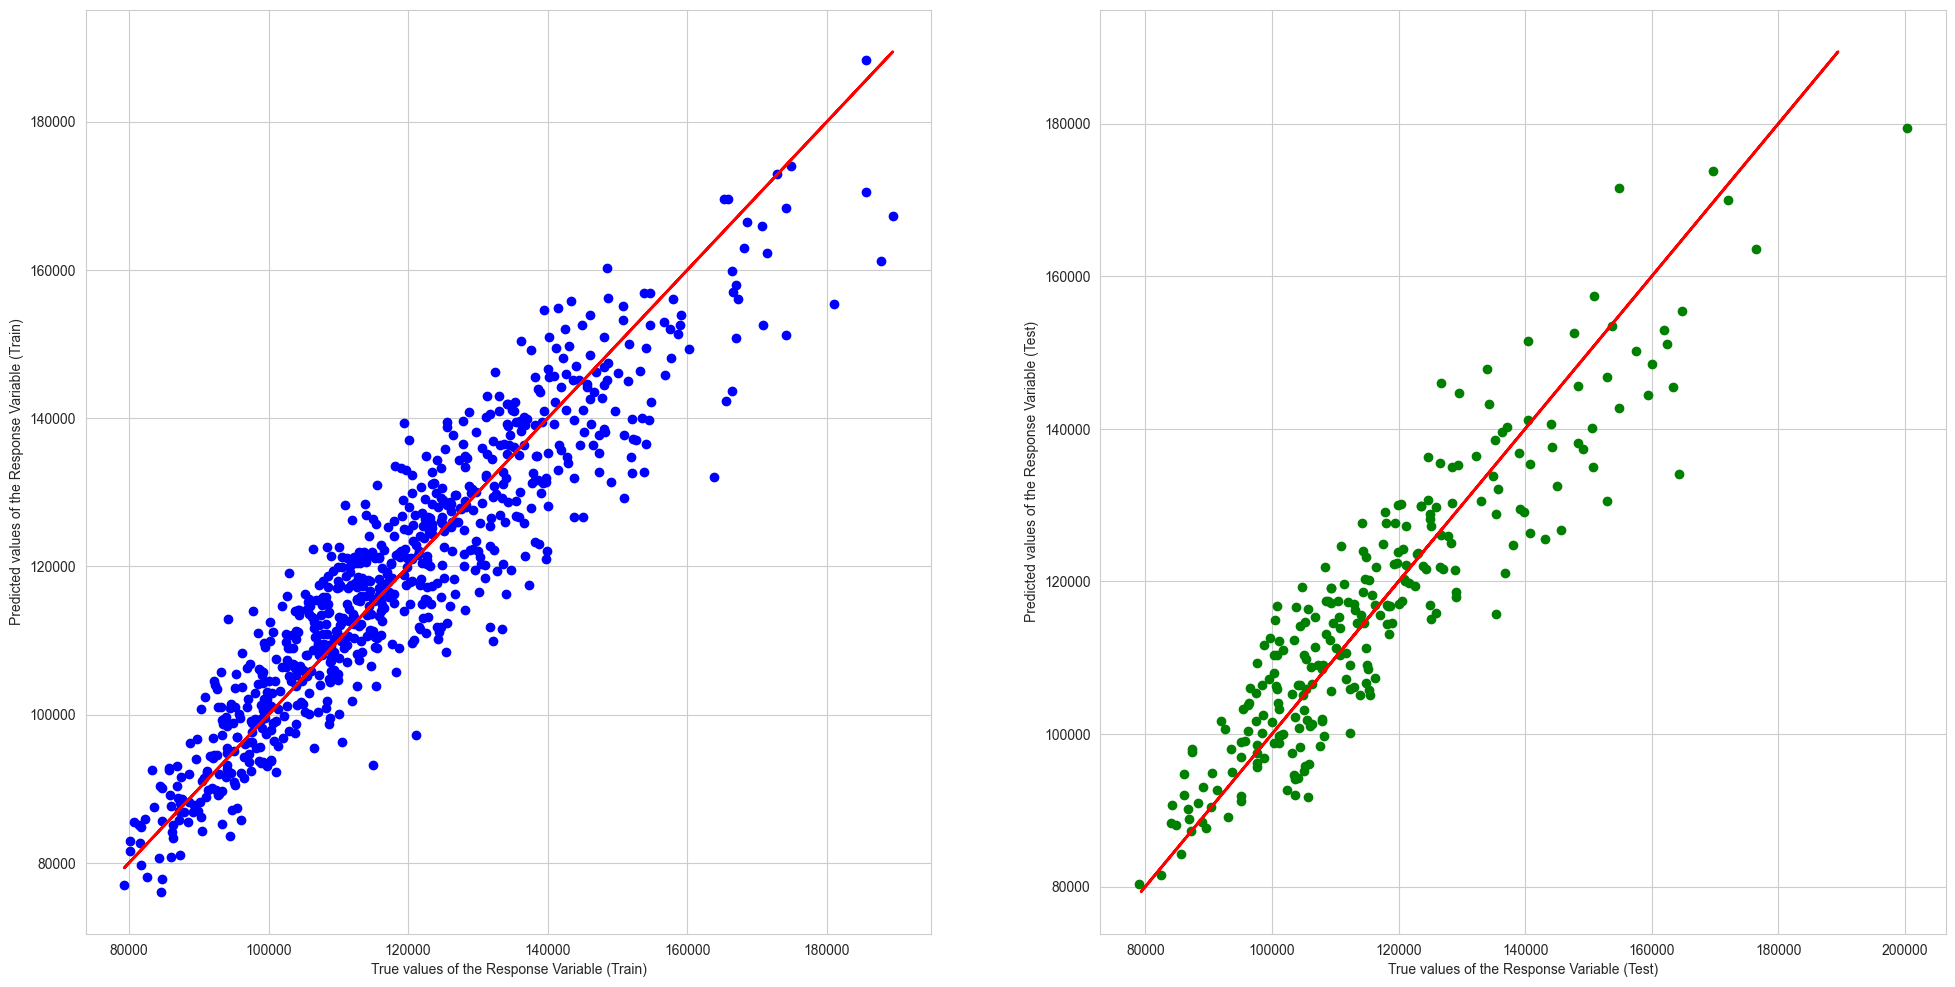

In [339]:
# splits data points into random train and test subsets
# but setting random_state for the markdown
X_train, X_test, y_train, y_test = train_test_split(problem_2_data_totalcs, problem_2_data_totalgold, test_size=0.25, random_state=100)

# linear regression using train data
linreg = LinearRegression() # create the linear regression object
linreg.fit(X_train, y_train) # train the linear regression model

# coefficients of the linear regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# predict totalgold values corresponding to totalcs
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# goodness of fit (on train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# goodness of fit (on test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# plot the predictions vs the true values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# train data
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, color = "red", linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

# test data
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_train, y_train, color = "red", linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

Both the explained variance and the mean squared error for both train and test dataset are similiar and consistent.

And with a significant higher explained variance (train: 0.856, test: 0.839) and lower mean squared error (train: 59,328,416, test: 64,692,970), this shows that 'totalcs' is a very good predictor for 'totalgold' when compared to 'kills'.

This is the same finding as the finding from the joint plot section above.

#### Predict 'totalgold' Using 'neutralObjectives'

| Predictor (X) | Response (y) |
| - | - |
| `neutralObjectives` | `totalgold` |

Intercept of Regression 	: b =  [49959.26033766]
Coefficients of Regression 	: a =  [[10343.2661112]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6428393146367501
Mean Squared Error (MSE) 	: 147701779.69727728

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5986048206381305
Mean Squared Error (MSE) 	: 161345899.72097087



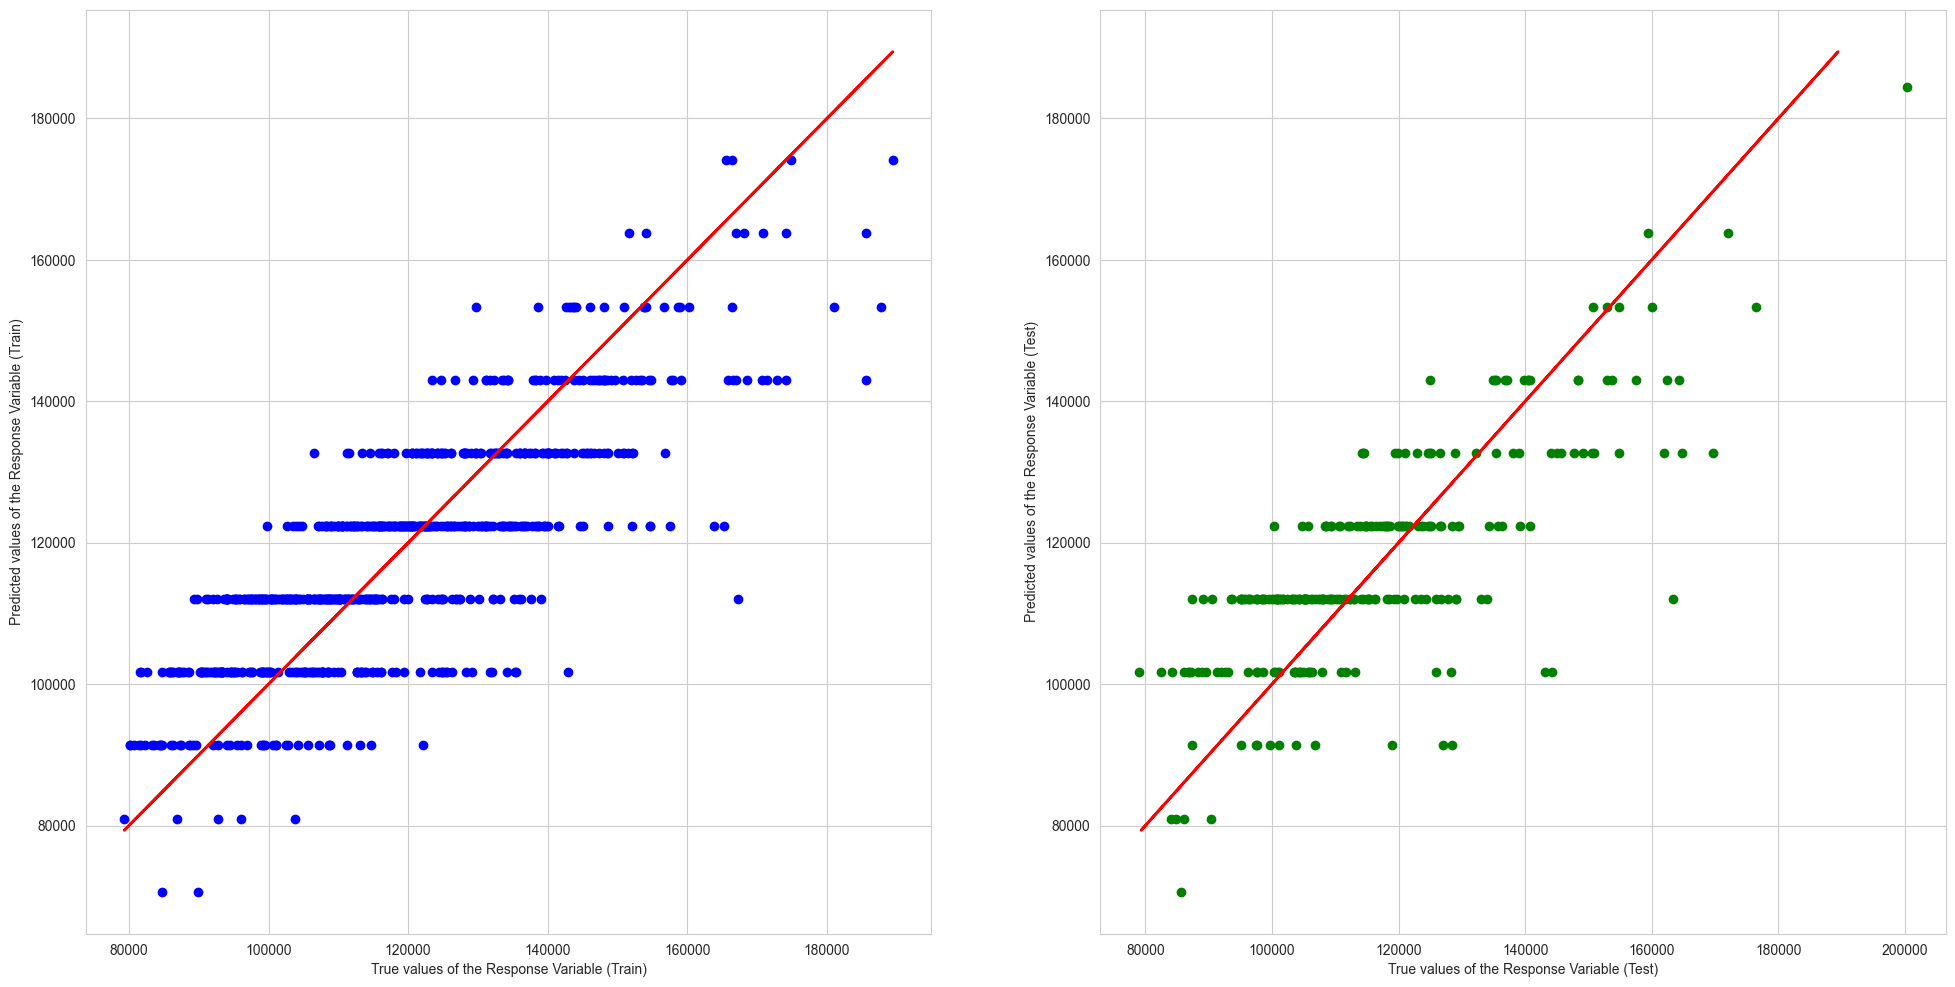

In [340]:
# splits data points into random train and test subsets
# but setting random_state for the markdown
X_train, X_test, y_train, y_test = train_test_split(problem_2_data_neutralObjectives, problem_2_data_totalgold, test_size=0.25, random_state=100)

# linear regression using train data
linreg = LinearRegression()  # create the linear regression object
linreg.fit(X_train, y_train) # train the linear regression model

# coefficients of the linear regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# predict totalgold values corresponding to neutralObjectives
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# goodness of fit (on train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# goodness of fit (on test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# plot the predictions vs the true values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# train data
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, color = "red", linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

# test data
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_train, y_train, color = "red", linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

Both the explained variance and the mean squared error for both train and test dataset are similiar and consistent.

The explained variance (train: 0.642, test: 0.598) and mean squared error (train: 147,701,779, test: 161,345,899) are also better than 'kills', but worse then 'totalcs'. This shows that 'neutralObjectives' can be used to predict 'totalgold', but 'totalcs' is still a better predictor.

This is the same finding as the finding from the joint plot section above.

#### Predict 'totalgold' Using 'structures'

| Predictor (X) | Response (y) |
| - | - |
| `structures` | `totalgold` |

Intercept of Regression 	: b =  [112747.81303652]
Coefficients of Regression 	: a =  [[371.17604947]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0226851534545095
Mean Squared Error (MSE) 	: 404163022.62531567

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.014340369544048048
Mean Squared Error (MSE) 	: 396198430.0543458



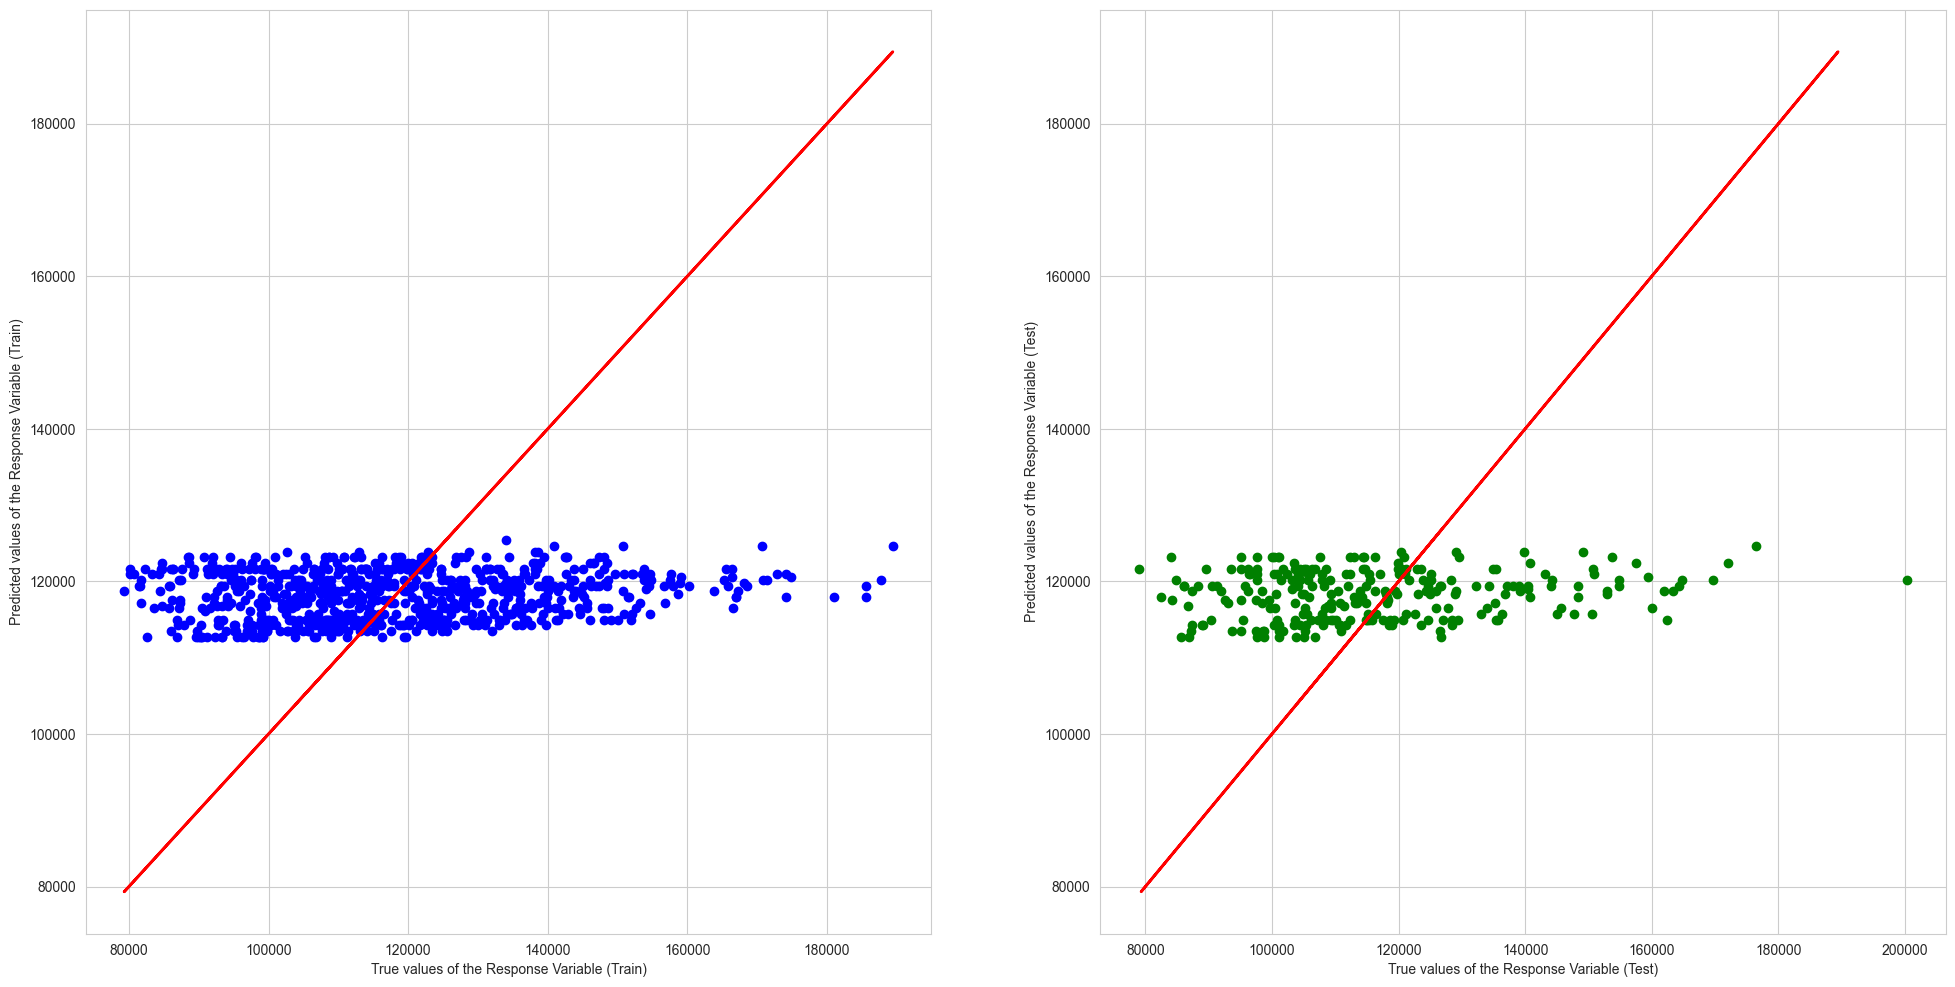

In [341]:
# splits data points into random train and test subsets
# but setting random_state for the markdown
X_train, X_test, y_train, y_test = train_test_split(problem_2_data_structures, problem_2_data_totalgold, test_size=0.25, random_state=100)

# linear regression using train data
linreg = LinearRegression() # create the linear regression object
linreg.fit(X_train, y_train) # train the linear regression model

# coefficients of the linear regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# predict totalgold values corresponding to structures
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# goodness of fit (on train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# goodness of fit (on test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# plot the predictions vs the true values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# train data
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, color = "red", linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

# test data
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_train, y_train, color = "red", linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

The explained variance is somewhat similar and consistent for both train and test dataset, while and the mean squared error for both train and test dataset is  similiar and consistent.

The explained variance (train: 0.022, test: 0.014) is very low (almost 0) when compared to the other 3 variables. The mean squared error (train: 404,163,022, test: 396,198,430) is also very high, even higher than 'kills'. This shows that 'structures' is not a good predictor for 'totalgold'.

This may be due to the almost horizontal spread of the data points as seen in the scatter plots above.

This is the same finding as the finding from the joint plot section above.

### Conclusion

Out of the 4 game variables, Total Minion Score ('totalcs') is the most suitable to predict the Total Combined Gold follows by Neutral Objectives ('neutralObjectives').

Total Kills ('kills') is not a very good predictor, while Structures ('structures') should not be used to predict Total Combined Gold.